# Telecom Churn - Case Study

## 1. Introduction

### 1.1 Business Description
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.

### 1.2 Problem Statement
- In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. 
- It is very important for any telecom operator to prevent the present customers from churning to other operators.
- In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
- Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition to reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

### 1.3 Objective
- The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:
    - to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
    - to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
    - Recommend strategies to manage customer churn based on your observations.
    - Use a dimensionality reduction technique such as PCA to handle large number of attributes and then build a predictive model

## 2. Data Understanding and Preparation

### 2.1 Importing Libraries and Packages

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

import warnings #Warnings
warnings.filterwarnings ("ignore")
pd.set_option('display.max_columns', None)

### 2.2 Data Loading : Training and Test Data Set

In [2]:
# Inspecting the data dictionary
data_dict = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-67/data_dictionary.csv")
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [3]:
df_telecom_train = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-67/train.csv")#reading the CSV file as dataframe
df_telecom_train.head() #diplaying the 1st few rows of the dataset

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [4]:
#Finding the number of rows and columns in the data
df_telecom_train.shape

(69999, 172)

In [5]:
#Fetching the information that we can get from the dataset
df_telecom_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
#Describing the data in terms of range
df_telecom_train.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [7]:
df_telecom_test = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-67/test.csv")#reading the CSV file as dataframe
df_telecom_test_bkp=df_telecom_test.copy()
df_telecom_test.head() #diplaying the 1st few rows of the dataset

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [8]:
#Finding the number of rows and columns in the data
df_telecom_test.shape

(30000, 171)

In [9]:
#Fetching the information that we can get from the dataset
df_telecom_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [10]:
#Describing the data in terms of range
df_telecom_test.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  30000.000000    30000.0         29684.0         29684.0   
mean   84998.500000      109.0             0.0             0.0   
std     8660.398374        0.0             0.0             0.0   
min    69999.000000      109.0             0.0             0.0   
25%    77498.750000      109.0             0.0             0.0   
50%    84998.500000      109.0             0.0             0.0   
75%    92498.250000      109.0             0.0             0.0   
max    99998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29684.0  30000.000000  30000.000000  30000.000000  28831.000000   
mean              0.0    282.644348    279.355021    279.845167    130.629693   
std               0.0    314.560212    323.205370    326.437029    290.677420   
min               0.0   -185.043000  -2014.045000   -146.859000      0.000000   
25%               0.0     92.907500     87.504750     84.180500      7.280000   
50%               0.0    198.227500    191.775000    191.690500     34.760000   
75%               0.0    371.969250    365.250750    367.804750    117.170000   
max               0.0  10955.066000  13224.119000  13505.996000   6944.360000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  28828.000000  28325.000000  28831.000000  28828.000000  28325.000000   
mean     133.148632    133.111348    195.745473    196.792375    196.647889   
std      302.921820    301.951806    316.923836    333.628481    334.277643   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.540000     34.385000     32.110000     31.740000   
50%       32.550000     33.060000     95.830000     91.435000     92.810000   
75%      115.210000    117.730000    229.230000    224.972500    225.760000   
max     7411.010000   6723.790000   6962.460000   9667.130000  13547.840000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   28831.000000   28828.000000   28325.000000   28831.000000   
mean       10.380431       7.465889       7.967267      13.269785   
std        99.973352     103.337675      94.622596      66.475975   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13724.380000   15371.040000   13095.360000    2165.440000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   28828.000000   28325.000000      28831.000000      28828.000000   
mean        9.763957      10.440251         47.557601         47.188688   
std        58.325466      64.933372        150.588656        156.664295   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.650000          1.580000   
50%         0.000000       0.000000         11.930000         11.680000   
75%         0.000000       0.000000         41.410000         40.190000   
max      1878.860000    2860.510000       5878.530000       7163.210000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      28325.000000      28831.000000      28828.000000      28325.000000   
mean          46.359887         93.584273         92.793180         93.238288   
std          145.087354        164.481651        165.674188        164.516683   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.580000          9.770000          9.890000          9.740000   
50%           11.690000         41.010000         41.060000         40.440000   
75%           40.490000        110.330000        107.645000        108.680000   
max         6723.790000       4729

### 2.3 Data Cleaning and Preparation

In [11]:
# Function to display unique values in column
def print_unique_vals(columns_array):
    for col in columns_array:
        print(df_telecom_train[col].value_counts(dropna=False))
        print("--------------------------------------")

In [12]:
# Handling columns having only 1 unique values
cols_with_single_value = []
for col in df_telecom_train.columns:
    if df_telecom_train[col].nunique() == 1:
        cols_with_single_value.append(col)

print(cols_with_single_value)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [13]:
print_unique_vals(cols_with_single_value)

circle_id
109    69999
Name: count, dtype: int64
--------------------------------------
loc_og_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64
--------------------------------------
std_og_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64
--------------------------------------
loc_ic_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64
--------------------------------------
last_date_of_month_6
6/30/2014    69999
Name: count, dtype: int64
--------------------------------------
last_date_of_month_7
7/31/2014    69600
NaN            399
Name: count, dtype: int64
--------------------------------------
last_date_of_month_8
8/31/2014    69266
NaN            733
Name: count, dtype: int64
--------------------------------------
std_og_t2c_mou_6
0.0    67231
NaN     2768
Name: count, dtype: int64
--------------------------------------
std_og_t2c_mou_7
0.0    67312
NaN     2687
Name: count, dtype: int64
--------------------------------------
std_og_t2c_mou_8
0.0    6

In [14]:
# Based on the dataset, we remove single value columns from the training set
df_telecom_train.drop(cols_with_single_value, axis=1, inplace=True)

# Based on the dataset, we remove single value columns from the test set
df_telecom_test.drop(cols_with_single_value, axis=1, inplace=True)

In [15]:
# Remove the id column since it is unique for every row from the training set
df_telecom_train.drop(['id'], axis=1, inplace=True)
df_telecom_test.drop(['id'], axis=1, inplace=True)

In [16]:
# Rename vbc columns to be similar as rest of the column name standards
df_telecom_train.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)
df_telecom_test.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)

In [17]:
# Generating a list of column names based on their corresponding types

# date type columns
date_cols = ['date_of_last_rech_6',
            'date_of_last_rech_7',
            'date_of_last_rech_8',
            'date_of_last_rech_data_6',
            'date_of_last_rech_data_7',
            'date_of_last_rech_data_8',
            ]

# categorical columns
cat_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
           ]

# target column
target_col=["churn_probability"]

# Numerical columns
numerical_cols = [col for col in df_telecom_train.columns if col not in date_cols + cat_cols + target_col]

In [18]:
# Drop date related columns as numerical column values are already separated out per month and normalised already
df_telecom_train.drop(date_cols, axis=1, inplace=True)
df_telecom_test.drop(date_cols, axis=1, inplace=True)

# Reindex data frame after removing columns
df_telecom_train=df_telecom_train.reindex(axis=0)
df_telecom_test=df_telecom_test.reindex(axis=0)

In [19]:
# Check null values for numerical columns
miss_numval_cols = round(100*(df_telecom_train[numerical_cols].isna().sum(axis=0)/df_telecom_train[numerical_cols].shape[0]), 2)
miss_numval_cols=miss_numval_cols[miss_numval_cols > 0].sort_values(ascending=False)
print(miss_numval_cols)
miss_numval_cols=np.array(miss_numval_cols.index.array)

count_rech_2g_6       74.90
total_rech_data_6     74.90
arpu_2g_6             74.90
av_rech_amt_data_6    74.90
max_rech_data_6       74.90
                      ...  
std_og_mou_7           3.84
isd_ic_mou_7           3.84
std_og_t2f_mou_7       3.84
loc_ic_mou_7           3.84
ic_others_7            3.84
Length: 102, dtype: float64


In [20]:
# For most of the columns more then `74%` values for **recharge** related data are missing.
# There is pattern in each month recharge data as each column can't co-exists with each other
df_telecom_train[miss_numval_cols] = df_telecom_train[miss_numval_cols].fillna(0)
df_telecom_test[miss_numval_cols] = df_telecom_test[miss_numval_cols].fillna(0)

In [21]:
# Check null values for categorical columns
miss_catval_cols = round(100*(df_telecom_train[cat_cols].isna().sum(axis=0)/df_telecom_train[cat_cols].shape[0]), 2)
miss_catval_cols[miss_catval_cols > 10].sort_values(ascending=False)

night_pck_user_6    74.90
fb_user_6           74.90
night_pck_user_7    74.48
fb_user_7           74.48
night_pck_user_8    73.69
fb_user_8           73.69
dtype: float64

In [22]:
# Very high percentage of null values in categorical column. Fill with -1 so that it can be dropped during dummy variable creation
df_telecom_train[cat_cols] = df_telecom_train[cat_cols].fillna(-1).astype('category')
df_telecom_test[cat_cols] = df_telecom_test[cat_cols].fillna(-1).astype('category')
print(df_telecom_train[cat_cols].isnull().sum()*100/df_telecom_train.shape[1])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [23]:
# Check for columns with more than 0% missing values in the training dataset
miss_val_cols = round(100*(df_telecom_train.isna().sum(axis=0)/df_telecom_train.shape[0]), 2)
miss_val_cols=miss_val_cols[miss_val_cols > 0].sort_values(ascending=False)
print(miss_val_cols)
miss_val_cols=np.array(miss_val_cols.index.array)

Series([], dtype: float64)


### 2.4 Derived Metrics

In [24]:
# Recharge amount for data packs is not readily available and given number of recharges and average value per month
# Total recharge amount data = Average recharge amount for data * Number of recharges for data

# Handle for training data set
df_telecom_train['total_rech_amt_data_6'] = df_telecom_train.av_rech_amt_data_6 * df_telecom_train.total_rech_data_6 
df_telecom_train['total_rech_amt_data_7'] = df_telecom_train.av_rech_amt_data_7 * df_telecom_train.total_rech_data_7
df_telecom_train['total_rech_amt_data_8'] = df_telecom_train.av_rech_amt_data_8 * df_telecom_train.total_rech_data_8

# Handle for testing data set
df_telecom_test['total_rech_amt_data_6'] = df_telecom_test.av_rech_amt_data_6 * df_telecom_test.total_rech_data_6 
df_telecom_test['total_rech_amt_data_7'] = df_telecom_test.av_rech_amt_data_7 * df_telecom_test.total_rech_data_7
df_telecom_test['total_rech_amt_data_8'] = df_telecom_test.av_rech_amt_data_8 * df_telecom_test.total_rech_data_8

# Remove average recharge and number of recharge columns from train and test dataset
drop_data_cols = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                  'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']
df_telecom_train.drop(drop_data_cols, axis=1, inplace=True)
df_telecom_test.drop(drop_data_cols, axis=1, inplace=True)

df_telecom_train=df_telecom_train.reindex(axis=0)
df_telecom_test=df_telecom_test.reindex(axis=0)

In [25]:
# Another column on total recharge value can be derived further
# Total recharge amount paid = Total recharge amount for other packs + Total recharge amount for data packs

# Handle for training data set
df_telecom_train['total_paid_amt_6'] = df_telecom_train.total_rech_amt_6 + df_telecom_train.total_rech_amt_data_6
df_telecom_train['total_paid_amt_7'] = df_telecom_train.total_rech_amt_7 + df_telecom_train.total_rech_amt_data_7
df_telecom_train['total_paid_amt_8'] = df_telecom_train.total_rech_amt_8 + df_telecom_train.total_rech_amt_data_8

# Handle for testing data set
df_telecom_test['total_paid_amt_6'] = df_telecom_test.total_rech_amt_6 + df_telecom_test.total_rech_amt_data_6
df_telecom_test['total_paid_amt_7'] = df_telecom_test.total_rech_amt_7 + df_telecom_test.total_rech_amt_data_7
df_telecom_test['total_paid_amt_8'] = df_telecom_test.total_rech_amt_8 + df_telecom_test.total_rech_amt_data_8

# Defining total average recharge amount for good phase for months 6 and 7 (the good phase)
# Total average recharge amount for Good phase = (Total amount paid for 6th Month + Total amount paid for 7th Month) / 2
df_telecom_train['total_av_rech_amt_6_7']=(df_telecom_train.total_paid_amt_6 + df_telecom_train.total_paid_amt_7)/2
df_telecom_test['total_av_rech_amt_6_7']=(df_telecom_test.total_paid_amt_6 + df_telecom_test.total_paid_amt_7)/2

### 2.5 Create high valued customer data set
- Our first goal is to reduce churn of high values customer

In [26]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_cust = df_telecom_train.total_av_rech_amt_6_7.quantile(0.7)
print('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_cust),"\n")

high_val_cust_df_train = df_telecom_train[df_telecom_train.total_av_rech_amt_6_7 > high_value_cust]
print('Train dataframe Shape after Filtering High Value Customers: ' + str(high_val_cust_df_train.shape),"\n")

70 percentile of 6th and 7th months avg recharge amount: 477.5 

Train dataframe Shape after Filtering High Value Customers: (20998, 153) 



### 2.6 Outlier handling

In [27]:
# Function to handle outliers where we will not remove the rows or columns. Function will handle lower end and upper end outliers
# minimum value for lower end = mean - 3 * STD
# maximum value for upper end = mean + 3 * STD
def cap_outliers(array, k=3):
    lower_limit = array.mean() - k*array.std()
    upper_limit = array.mean() + k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [28]:
# Get numerical columns
numerical_cols = [col for col in high_val_cust_df_train.columns if col not in date_cols + cat_cols + target_col]

# Check 0.1% and 99.9% percentile values and compare against max values before outlier handling
high_val_cust_df_train.describe(percentiles=[0.001, .999])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  20998.000000  20998.000000  20998.000000  20998.000000  20998.000000   
mean     558.615136    558.865269    506.960572    262.640469    268.004666   
std      474.255764    494.976335    520.084549    464.644996    486.246457   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
0.1%      -3.001500    -25.682431     -5.000000      0.000000      0.000000   
50%      482.797500    479.758000    427.580500     84.830000     82.210000   
99.9%   3960.276770   4052.296623   3924.211618   4136.391570   4627.326110   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  20998.000000  20998.000000  20998.000000  20998.000000   20998.000000   
mean     234.272454    376.334644    377.859598    335.049136      16.085696   
std      464.896246    481.475258    492.030671    477.123528      77.480697   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
0.1%       0.000000      0.000000      0.000000      0.000000       0.000000   
50%       65.335000    224.055000    219.370000    183.255000       0.000000   
99.9%   4364.041360   4048.810780   4478.489020   4484.353400     968.354300   
max    10752.560000   8362.360000   7043.980000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   20998.000000   20998.000000   20998.000000   20998.000000   
mean       12.829175      12.077510      27.288036      20.334574   
std        77.755003      72.727139     119.988876      96.455538   
min         0.000000       0.000000       0.000000       0.000000   
0.1%        0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
99.9%    1022.492530     855.257280    1512.128300    1228.131310   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   20998.000000      20998.000000      20998.000000      20998.000000   
mean       19.282801         84.048096         85.231045         77.736759   
std       104.532286        229.434821        242.345600        231.684841   
min         0.000000          0.000000          0.000000          0.000000   
0.1%        0.000000          0.000000          0.000000          0.000000   
50%         0.000000         24.190000         24.540000         20.560000   
99.9%    1335.921790       2919.441040       3099.000720       2771.277230   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      20998.000000      20998.000000      20998.000000      20998.000000   
mean         162.725346        161.139631        150.021393          6.259113   
std          248.562573        234.969472        227.958568         20.198283   
min            0.000000          0.000000          0.000000          0.000000   
0.1%           0.000000          0.000000          0.000000          0.000000   
50%           76.970000         78.660000         67.770000          0.000000   
99.9%       2308.432540       2048.372150       2033.296380        259.495820   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      20998.000000      20998.000000      20998.000000      20998.000000   
mean           6.344762          5.854944          1.593639          1.864555   
std           20.480259         19.012881          6.639564          9.398686   
min            0.000000          0.000000          0.000000          0.000000   
0.1%           0.000000          0.000000          0.000000          0.000000   
50%            0.080000          0.0000

In [29]:
# Check 0.1% and 99.9% percentile values and compare against max values after outlier handling
high_val_cust_df_train[numerical_cols] = high_val_cust_df_train[numerical_cols].apply(cap_outliers, axis=0)
high_val_cust_df_train.describe(percentiles=[0.001, .999])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  20998.000000  20998.000000  20998.000000  20998.000000  20998.000000   
mean     548.521867    549.084833    496.804278    246.179636    250.887271   
std      357.956186    361.311079    383.937128    375.672618    388.793661   
min     -864.152156   -926.063736   -945.808000      0.000000      0.000000   
0.1%      -3.001500    -25.682431     -5.000000      0.000000      0.000000   
50%      482.797500    479.758000    427.580500     84.830000     82.210000   
99.9%   1981.382429   2043.794274   2067.214219   1656.575456   1726.744037   
max     1981.382429   2043.794274   2067.214219   1656.575456   1726.744037   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  20998.000000  20998.000000  20998.000000  20998.000000   20998.000000   
mean     216.606257    361.627680    362.383462    319.872164      12.402091   
std      356.148812    407.298926    412.530014    385.981272      42.035757   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
0.1%       0.000000      0.000000      0.000000      0.000000       0.000000   
50%       65.335000    224.055000    219.370000    183.255000       0.000000   
99.9%   1628.961192   1820.760419   1853.951610   1766.419719     248.527787   
max     1628.961192   1820.760419   1853.951610   1766.419719     248.527787   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   20998.000000   20998.000000   20998.000000   20998.000000   
mean        9.371770       8.934228      21.155358      15.190022   
std        36.392370      34.467759      68.926424      53.006397   
min         0.000000       0.000000       0.000000       0.000000   
0.1%        0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
99.9%     246.094183     230.258927     387.254663     309.701189   
max       246.094183     230.258927     387.254663     309.701189   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   20998.000000      20998.000000      20998.000000      20998.000000   
mean       14.528759         72.917484         73.565781         67.582525   
std        52.337546        132.879971        135.476314        126.724516   
min         0.000000          0.000000          0.000000          0.000000   
0.1%        0.000000          0.000000          0.000000          0.000000   
50%         0.000000         24.190000         24.540000         20.560000   
99.9%     332.879659        772.352560        812.267846        772.791282   
max       332.879659        772.352560        812.267846        772.791282   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      20998.000000      20998.000000      20998.000000      20998.000000   
mean         154.254839        153.625011        142.751196          5.356830   
std          199.282678        194.619133        187.525170         12.267045   
min            0.000000          0.000000          0.000000          0.000000   
0.1%           0.000000          0.000000          0.000000          0.000000   
50%           76.970000         78.660000         67.770000          0.000000   
99.9%        908.413065        866.048047        833.897097         66.853961   
max          908.413065        866.048047        833.897097         66.853961   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      20998.000000      20998.000000      20998.000000      20998.000000   
mean           5.439055          5.018542          1.319772          1.568223   
std           12.444206         11.639716          3.770034          4.572474   
min            0.000000          0.000000          0.000000          0.000000   
0.1%           0.000000          0.000000          0.000000          0.000000   
50%            0.080000          0.0000

## 3. EDA

### 3.1 Create functions which are used multiple times

In [30]:
# create box plot function for  6th, 7th and 8th month variables
def monthly_attr_churn_boxplot(attribute, title):
    plt.figure(figsize=(15,5))
    df = high_val_cust_df_train
    plt.subplot(1,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.title(f'{title} for Jun')
    plt.subplot(1,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.title(f'{title} for July')
    plt.subplot(1,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.title(f'{title} for Aug')
    plt.show()

In [31]:
# mean data for churn category for given columns list
def attr_mean_churn_barplot(df,columns_list):
    df_0 = df[df.churn_probability==0].filter(columns_list)
    df_1 = df[df.churn_probability==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index=['Non Churn'])
    mean_df_1 = pd.DataFrame([df_1.mean()],index=['Churn'])

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()

### 3.2 Univariate analysis

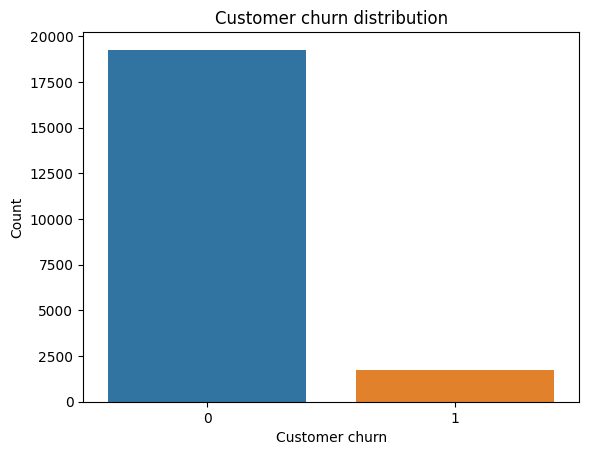

In [32]:
# Visualize churn distribution
sns.countplot(x = high_val_cust_df_train['churn_probability'])
plt.xlabel('Customer churn')
plt.ylabel('Count')
plt.title('Customer churn distribution')
plt.show()

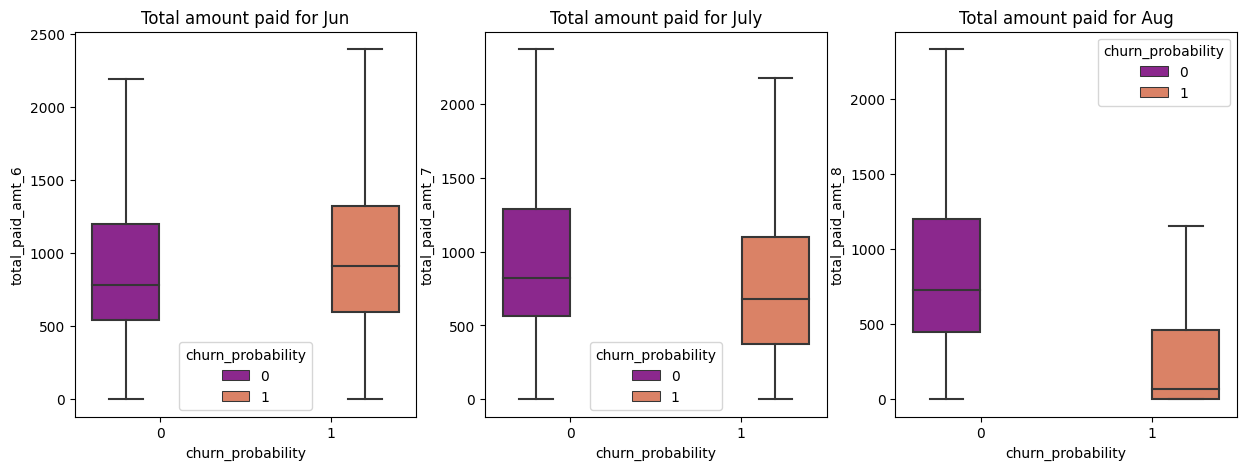

In [33]:
# Ploting for total recharge amount per month
monthly_attr_churn_boxplot('total_paid_amt',"Total amount paid")

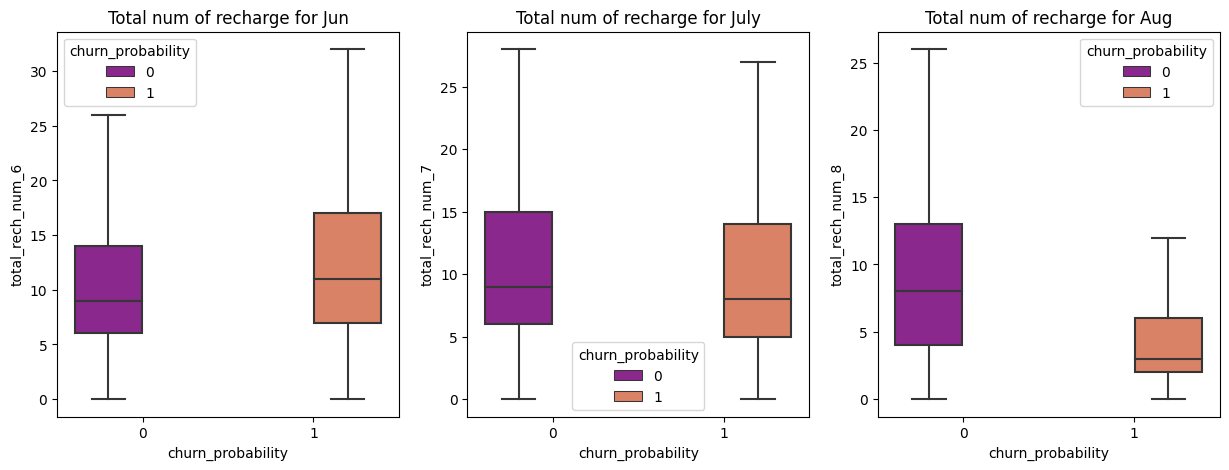

In [34]:
# Ploting for total number of recharges per month
monthly_attr_churn_boxplot('total_rech_num', "Total num of recharge")

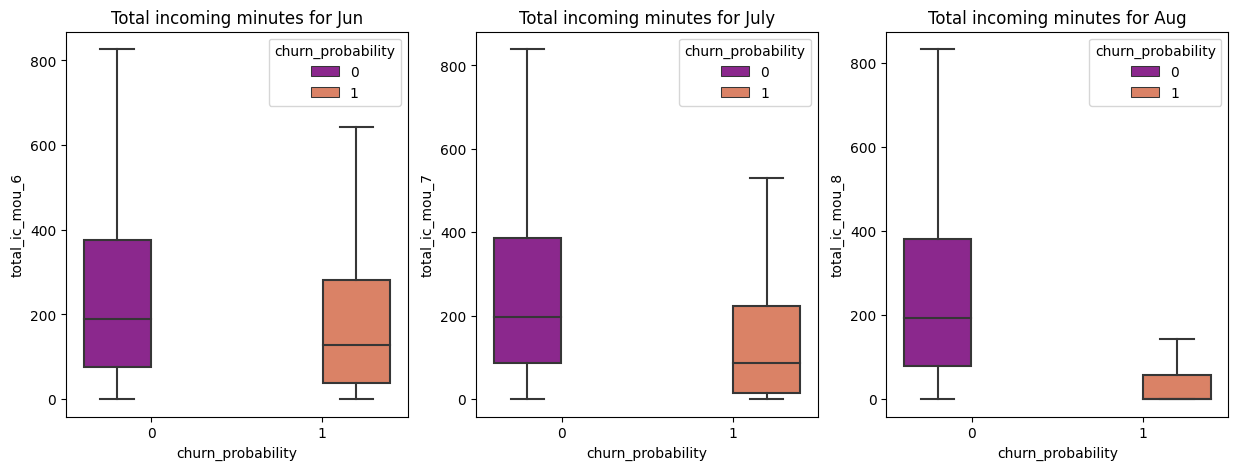

In [35]:
# Ploting for total incoming calls minutes of user
monthly_attr_churn_boxplot('total_ic_mou', "Total incoming minutes")

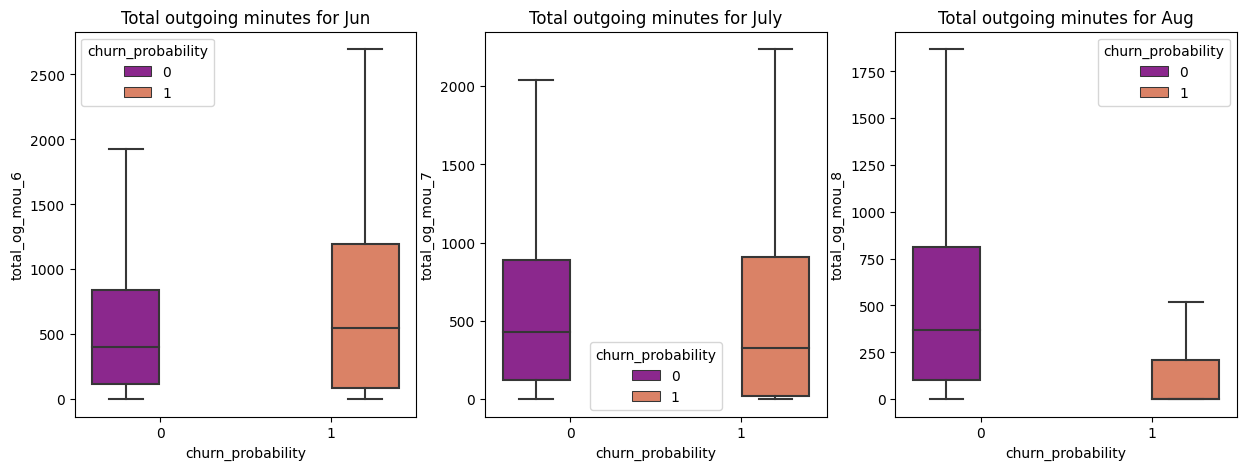

In [36]:
# Ploting for total outgoing calls minutes of user
monthly_attr_churn_boxplot('total_og_mou', "Total outgoing minutes")

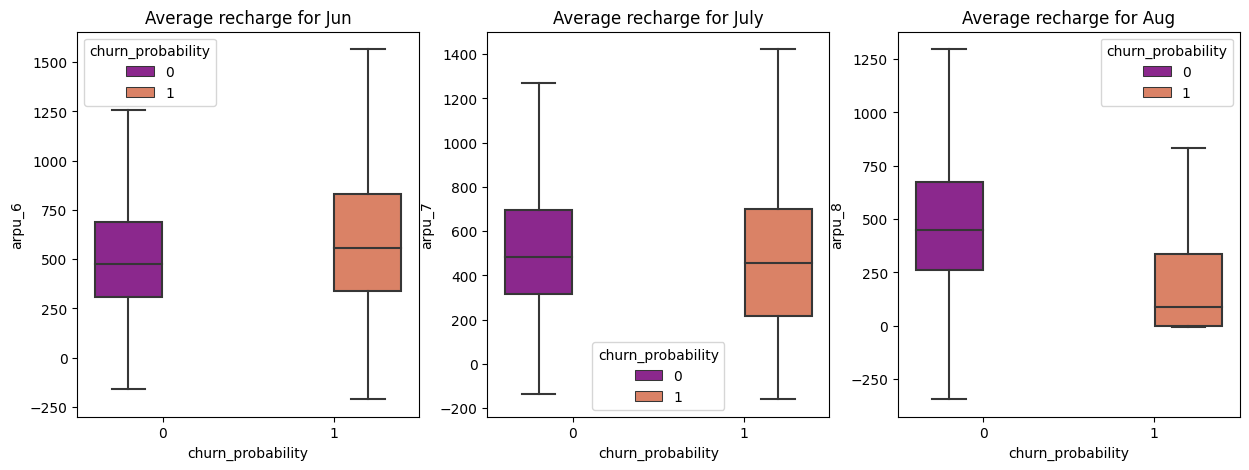

In [37]:
# Ploting for average recharge per user per month
monthly_attr_churn_boxplot('arpu', "Average recharge")

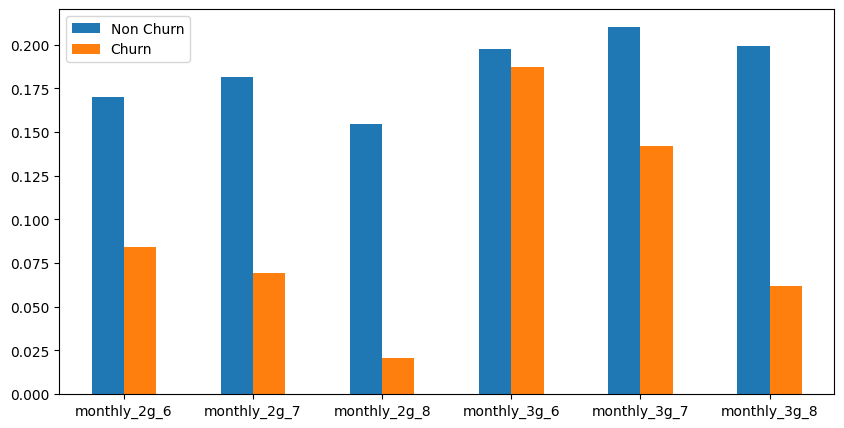

In [38]:
# Comparing average monthly 2G or 3G scheme validity for churned or not churned data
monthly_subcription_cols=high_val_cust_df_train.columns[high_val_cust_df_train.columns.str.contains('monthly_',regex=True)]
attr_mean_churn_barplot(high_val_cust_df_train, monthly_subcription_cols)

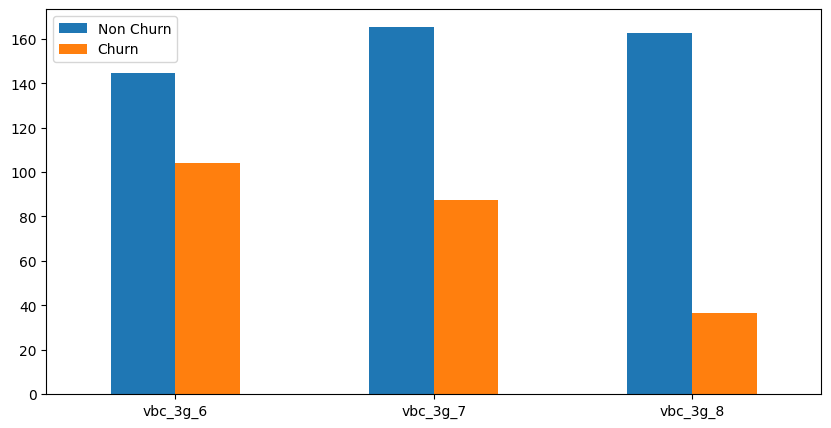

In [39]:
# Average volume based cost paid as per usage per month for churned or not churned data
vbc_cols=sorted(high_val_cust_df_train.columns[high_val_cust_df_train.columns.str.contains('vbc',regex=True)])
attr_mean_churn_barplot(high_val_cust_df_train, vbc_cols)

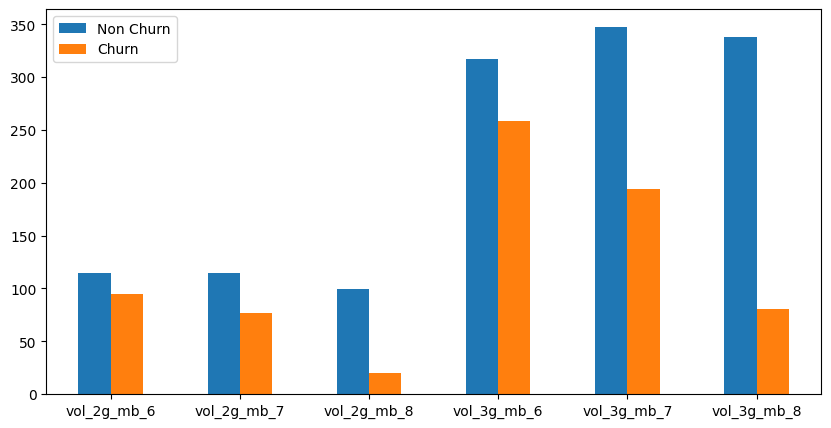

In [40]:
# Average usage volume for 2G or 3G spectrum in MB per month for churned or not churned data
vol_cols=high_val_cust_df_train.columns[high_val_cust_df_train.columns.str.contains('vol.*mb',regex=True)]
attr_mean_churn_barplot(high_val_cust_df_train, vol_cols)

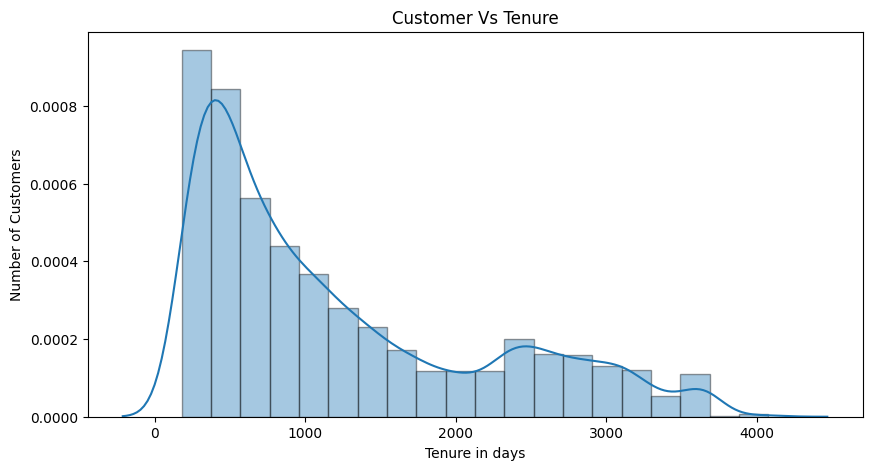

In [41]:
# Number of days customer using network and count plotted in bins
plt.figure(figsize=(10,5))
ax = sns.distplot(high_val_cust_df_train['aon'], bins=20, hist_kws={'edgecolor':'black'})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in days')
ax.set_title('Customer Vs Tenure')
plt.show()

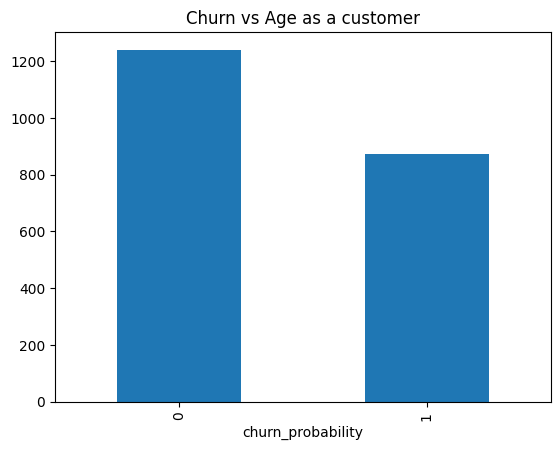

In [42]:
# Age on network average for churned and non churned customers
high_val_cust_df_train.groupby("churn_probability")["aon"].mean().plot.bar()
plt.title("Churn vs Age as a customer")
plt.show()

### 3.3 Bivariate analysis

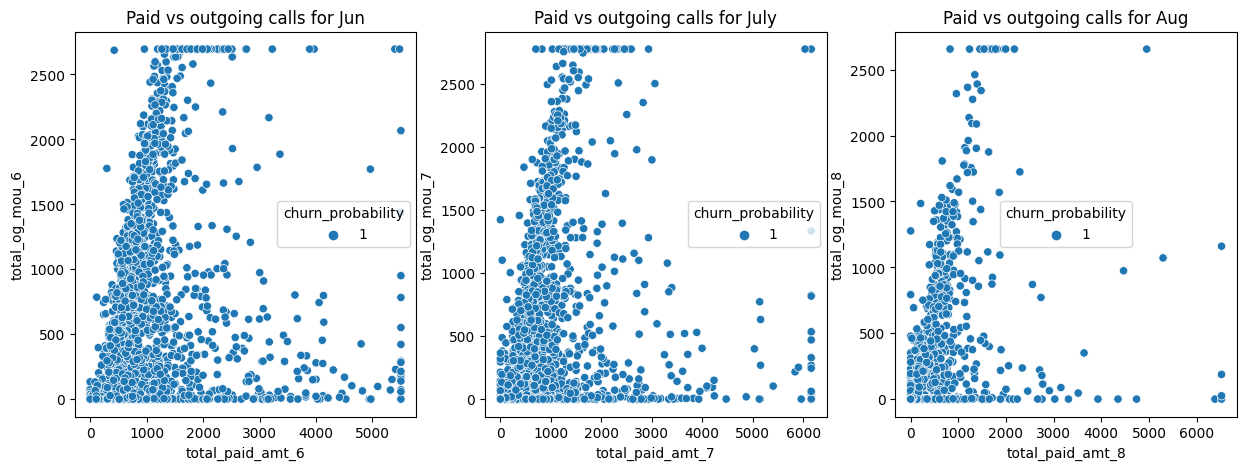

In [43]:
# Total paid amount vs outgoing calls usage identified on churn probability per month
plt.figure(figsize=(15,5))
df = high_val_cust_df_train
plt.subplot(1,3,1)
sns.scatterplot(df[df["churn_probability"]==1], x="total_paid_amt_6", y="total_og_mou_6", hue="churn_probability")
plt.title("Paid vs outgoing calls for Jun")
plt.subplot(1,3,2)
sns.scatterplot(df[df["churn_probability"]==1], x="total_paid_amt_7", y="total_og_mou_7", hue="churn_probability")
plt.title("Paid vs outgoing calls for July")
plt.subplot(1,3,3)
sns.scatterplot(df[df["churn_probability"]==1], x="total_paid_amt_8", y="total_og_mou_8", hue="churn_probability")
plt.title("Paid vs outgoing calls for Aug")
plt.show()

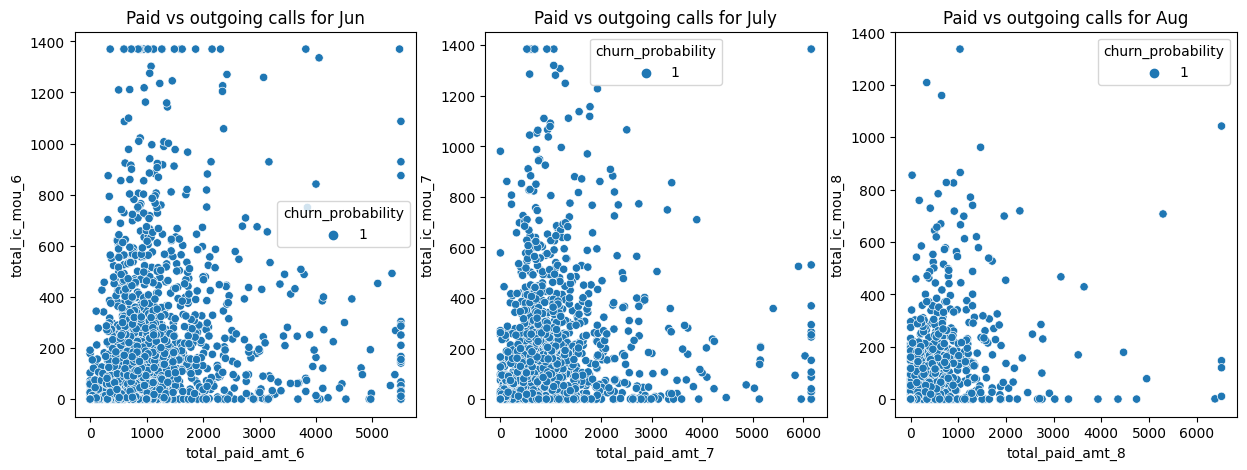

In [44]:
# Total paid amount vs incoming calls usage identified on churn probability per month
plt.figure(figsize=(15,5))
df = high_val_cust_df_train
plt.subplot(1,3,1)
sns.scatterplot(df[df["churn_probability"]==1], x="total_paid_amt_6", y="total_ic_mou_6", hue="churn_probability")
plt.title("Paid vs outgoing calls for Jun")
plt.subplot(1,3,2)
sns.scatterplot(df[df["churn_probability"]==1], x="total_paid_amt_7", y="total_ic_mou_7", hue="churn_probability")
plt.title("Paid vs outgoing calls for July")
plt.subplot(1,3,3)
sns.scatterplot(df[df["churn_probability"]==1], x="total_paid_amt_8", y="total_ic_mou_8", hue="churn_probability")
plt.title("Paid vs outgoing calls for Aug")
plt.show()

### 3.4 Correlation analysis

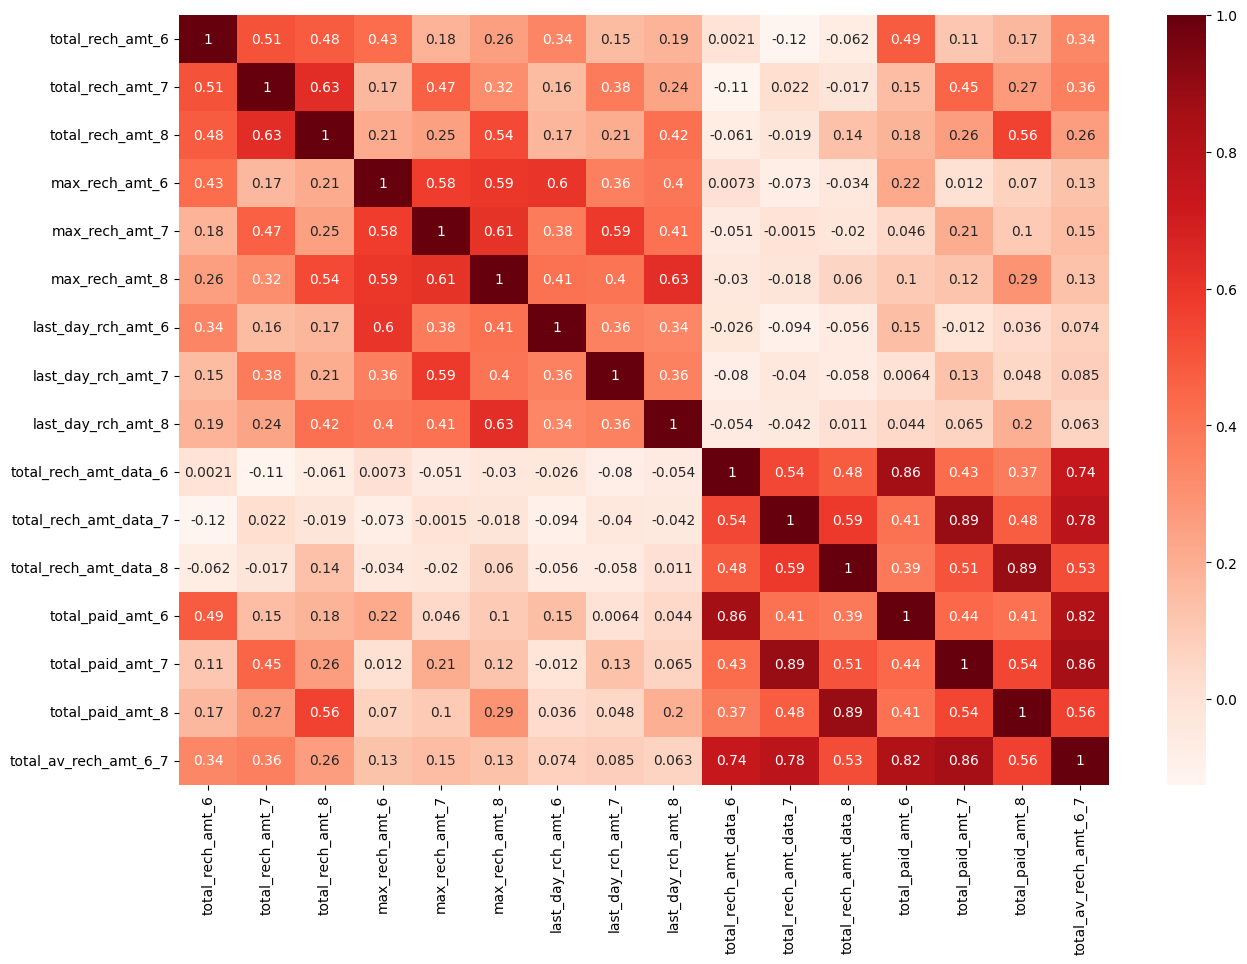

In [45]:
# Recharge amount column correlation with each other
amount_cols = high_val_cust_df_train.loc[:, high_val_cust_df_train.columns.str.contains('amt')]
plt.figure(figsize=(15,10))
sns.heatmap(amount_cols.corr(), annot=True, cmap="Reds")
plt.show()

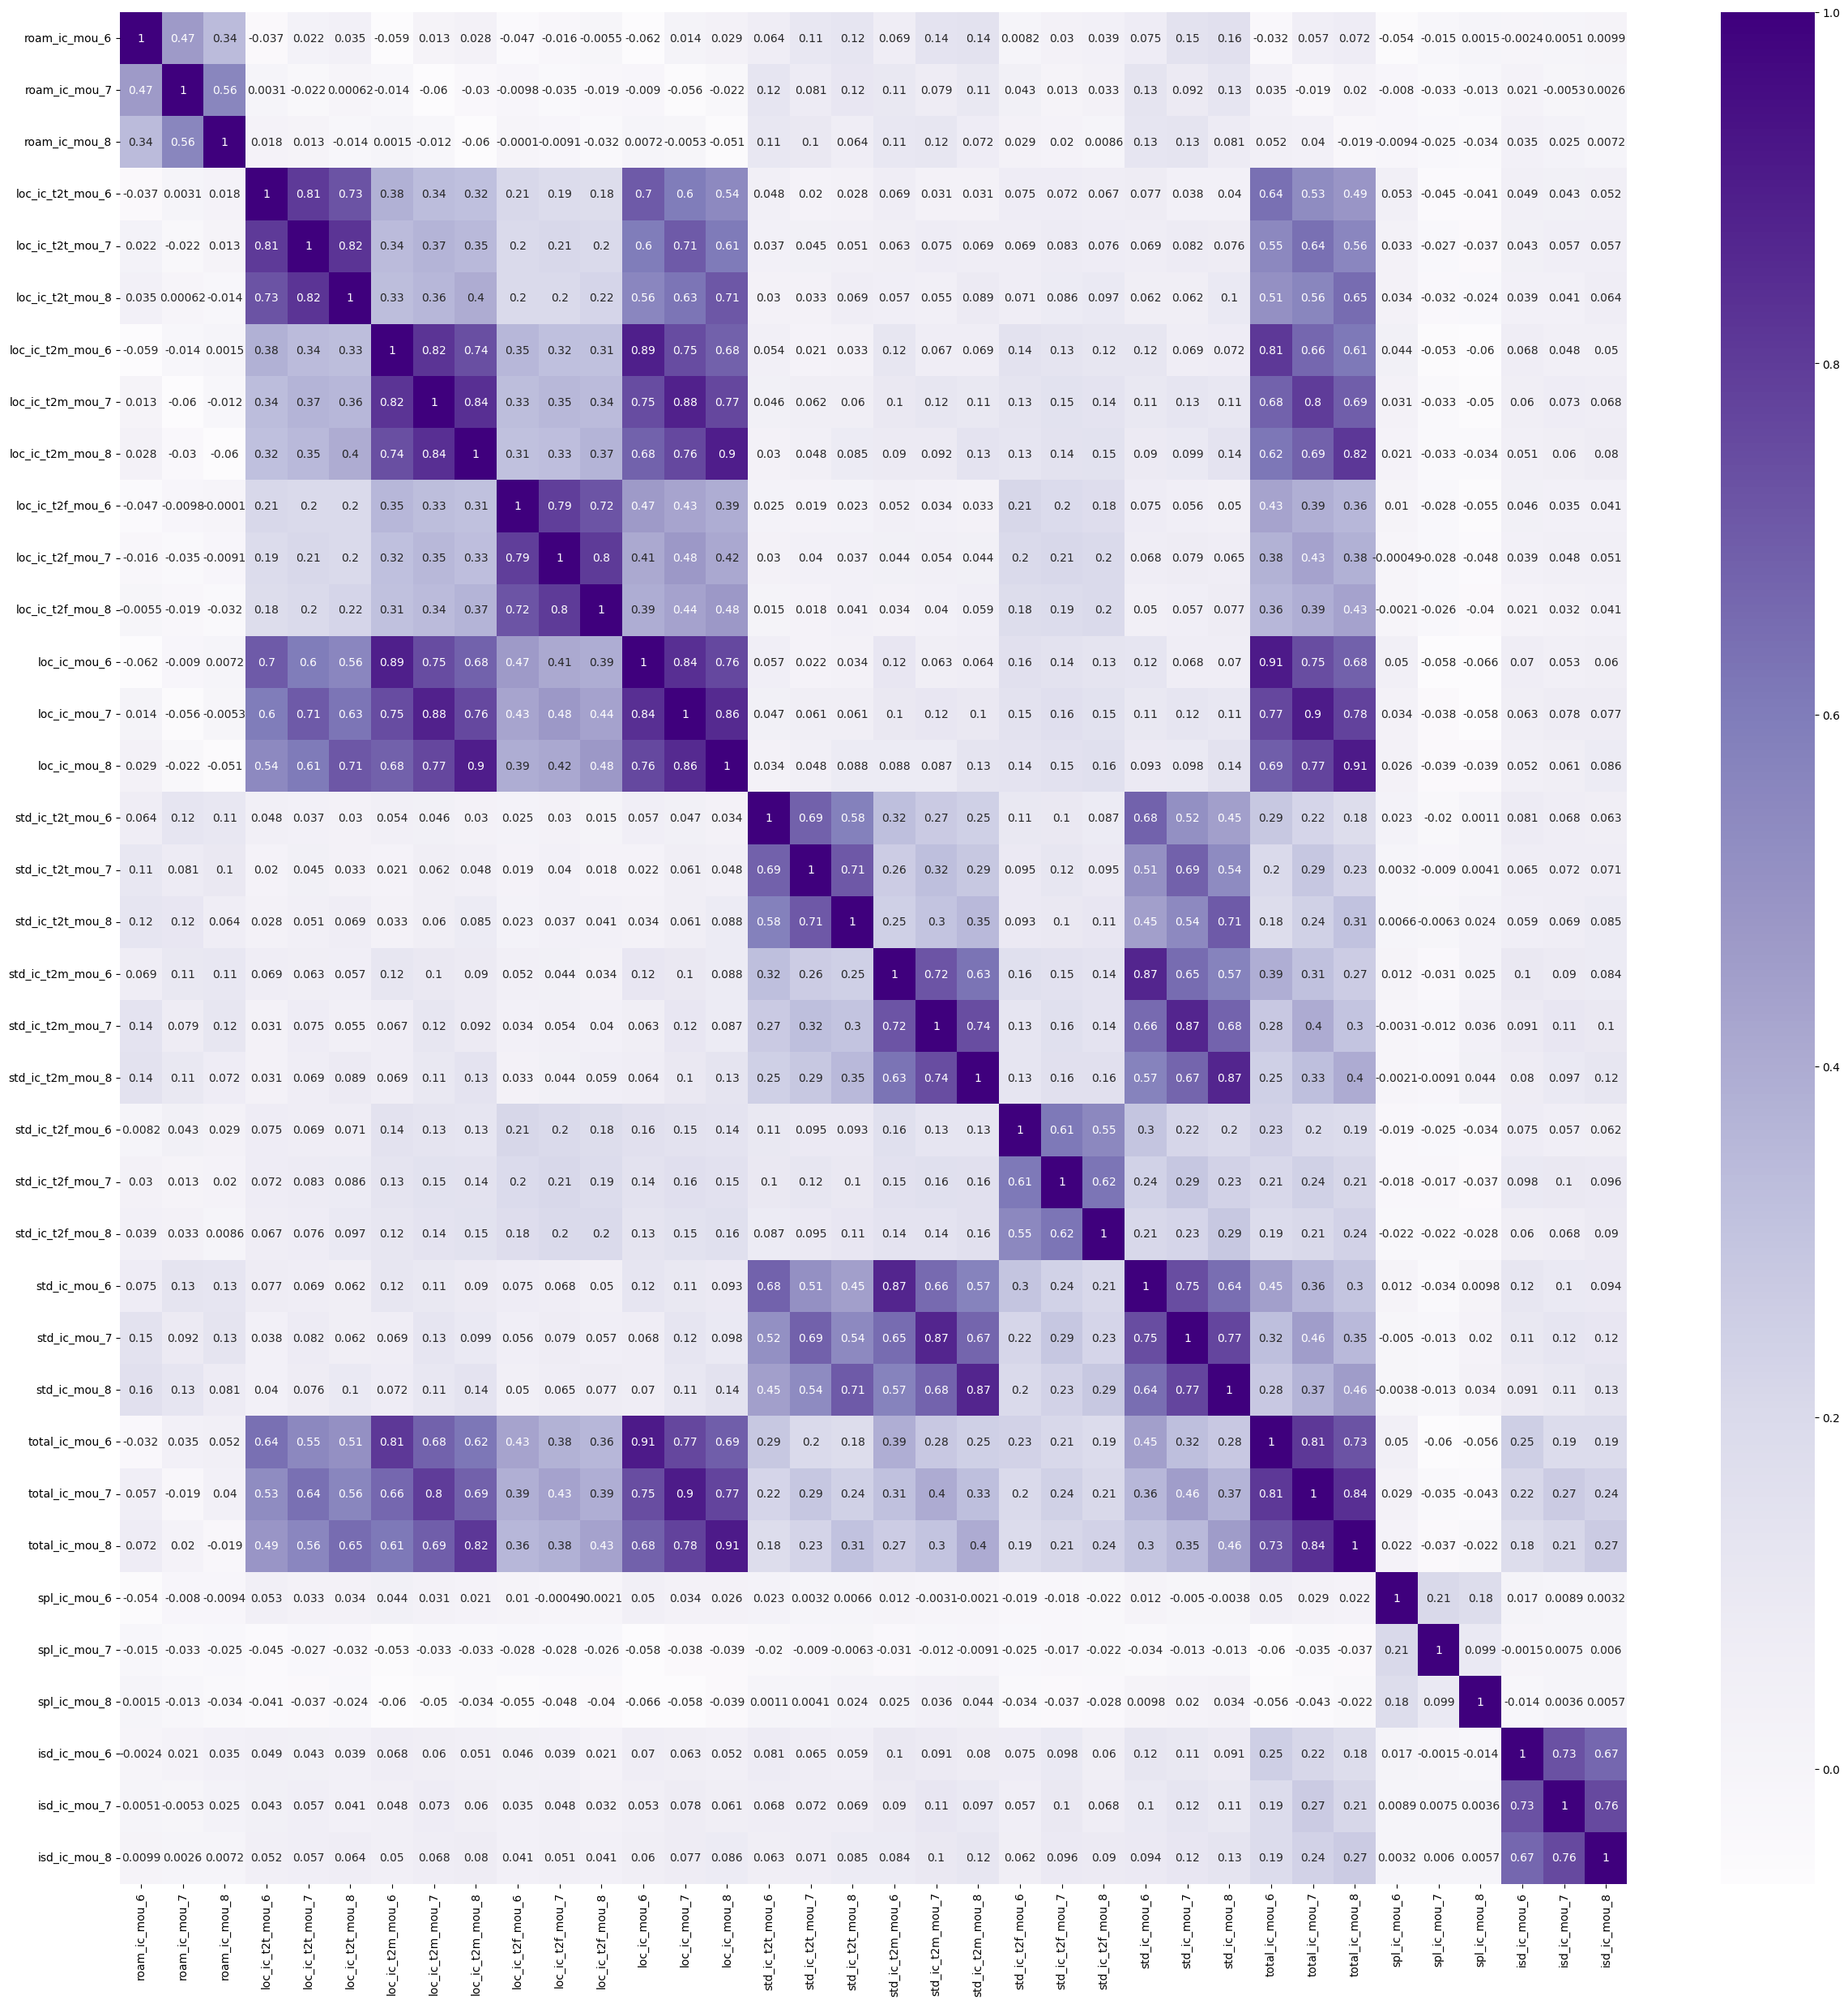

In [46]:
# Incoming calls minutes of user column correlation with each other
ic_mou_cols = high_val_cust_df_train.loc[:, high_val_cust_df_train.columns.str.contains('ic.*mou')]
plt.figure(figsize=(30, 30))
sns.heatmap(ic_mou_cols.corr(), annot=True, cmap='Purples')
plt.show()

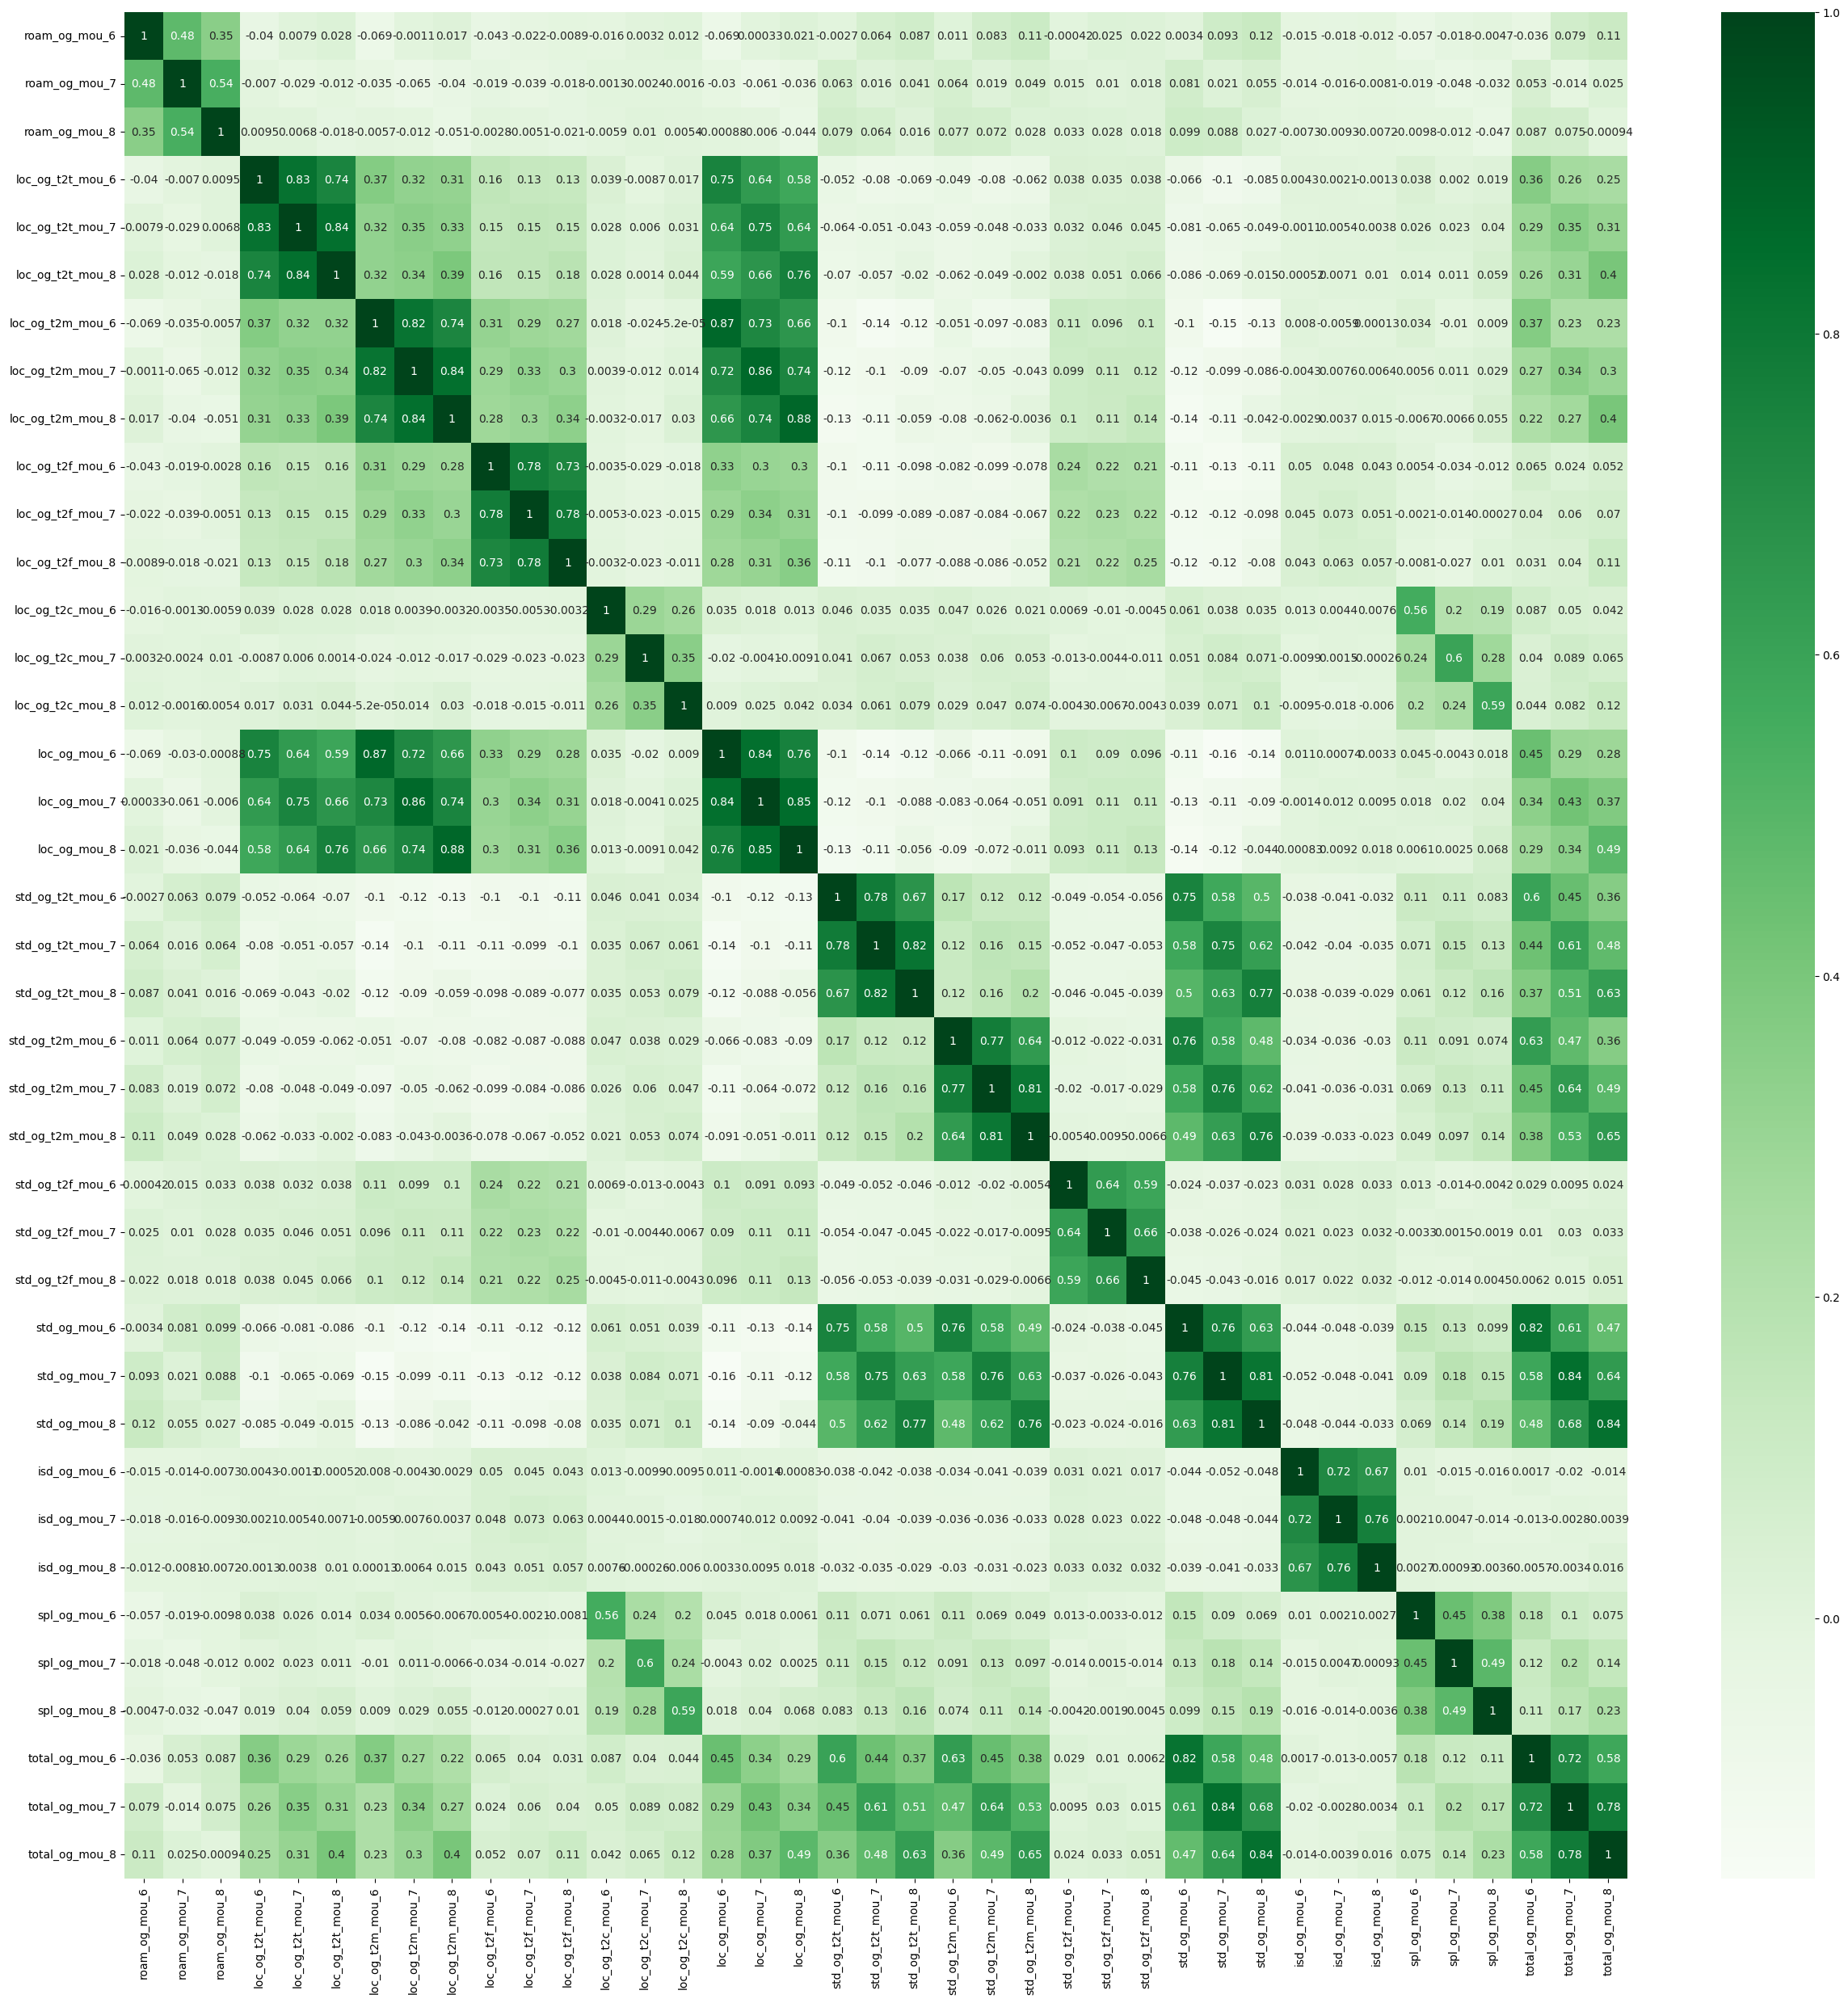

In [47]:
# Outgoing calls minutes of user column correlation with each other
og_mou_cols = high_val_cust_df_train.loc[:, high_val_cust_df_train.columns.str.contains('og.*mou')]
plt.figure(figsize=(30,30))
sns.heatmap(og_mou_cols.corr(), annot=True, cmap='Greens')
plt.show()

### 3.5 EDA Analysis
- Very high categorical imbalance between churned and non-churned in high valued customers data
- Total recharge amount paid reduces from good phase to action/churn phase only for churned customers
- Total number of recharges reduces from good phase to action/churn phase only for churned customers
- Total incoming calls reduces from good phase to action/churn phase only for churned customers
- Total outgoing calls reduces from good phase to action/churn phase only for churned customers
- Average recharge per user reduces from good phase to action/churn phase only for churned customers
- Number of customers in tenure less than 1000 days age on network are more than rest
- Average age on network of churned customer is much lesser than non churned. That means new customers are likely to get churned than older customers
- Customers paying high and not making outgoing or incoming calls are highly likely to get churned
- Total amount paid for data recharge and total amount paid overall are highly correlated in good phase months
- Total incoming calls are highly correlated with local incoming calls and then STD calls
- Total outgoing calls are highly correlated with STD calls nd then incoming calls

## 4. Feature engineering

### 4.1 Dummy variable creation

In [48]:
# Create dummy variables for night pack and facebook scheme

# Handle train data
for cat_col in cat_cols:
    dummy_df = pd.get_dummies(high_val_cust_df_train[cat_col], drop_first=True, dtype='int')
    dummy_df.columns = [cat_col+"_0", cat_col+"_1"]
    high_val_cust_df_train = pd.concat([high_val_cust_df_train, dummy_df], axis=1)

# Handle test data
for cat_col in cat_cols:
    dummy_df = pd.get_dummies(df_telecom_test[cat_col], drop_first=True, dtype='int')
    dummy_df.columns = [cat_col+"_0", cat_col+"_1"]
    df_telecom_test = pd.concat([df_telecom_test, dummy_df], axis=1)

In [49]:
# cat cols were having 74% empty fields which is difficult to handle and predict based on
# it is better to remove these columns
high_val_cust_df_train.drop(cat_cols, axis=1, inplace=True)
df_telecom_test.drop(cat_cols, axis=1, inplace=True)

# Remove derived metrics for good phase as data is already present part of month 6 and month 7
high_val_cust_df_train.drop(["total_av_rech_amt_6_7"], axis=1, inplace=True)
df_telecom_test.drop(["total_av_rech_amt_6_7"], axis=1, inplace=True)

high_val_cust_df_train=high_val_cust_df_train.reindex(axis=0)
df_telecom_test=df_telecom_test.reindex(axis=0)

### 4.2 Splitting train and test data

In [50]:
# Create X and Y data sets
X_train_final = high_val_cust_df_train.drop(['churn_probability'], axis=1)
y_train_final = high_val_cust_df_train['churn_probability']

In [51]:
# Split X and Y data sets with 70-30 ratio
# Use stratify to handle imbalance in churn data
X_train, X_val, y_train, y_val = train_test_split(X_train_final, y_train_final, test_size=0.3, random_state=42,stratify=y_train_final)

In [52]:
# Checking the shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)

X_train Shape: (14698, 157)
y_train Shape: (14698,)
X_val Shape: (6300, 157)
y_val Shape: (6300,)


### 4.3 Scale data set using standard scaler

In [53]:
# Use SandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# Only Transform validation set
X_val_scaled=pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index) 

# Only transform test set
X_test_scaled = pd.DataFrame(scaler.transform(df_telecom_test), columns=df_telecom_test.columns, index=df_telecom_test.index)

## 5. Model selection, model building, evaluation & prediction

### 5.1 Create common function for model evaluation

In [54]:
# Function for creating confusion matrix dataset
def create_confusion_matrix(y_true, y_pred):
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    sensitivity = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # True Positive Rate
    true_positive_rate = sensitivity

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # False Negative Rate
    false_negative_rate = round(FN / (FN + TP), 4)

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall/True Positive Rate', 'False Positive Rate', 'False Negative Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, true_positive_rate, false_positive_rate, false_negative_rate]
    })

    print(metrics_df)
    print("------------------------------------")

In [55]:
# Plot ROC AUC Curve
def draw_roc_auc_curve(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    print(f'ROC curve (area = {auc_score})')
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print("------------------------------------")

### 5.2 PCA Analysis

In [56]:
# Create PCA covering 97% variance
pca = PCA(0.97)

# Fit and transform training data to create pca components
pca_components = pca.fit_transform(X_train_scaled)

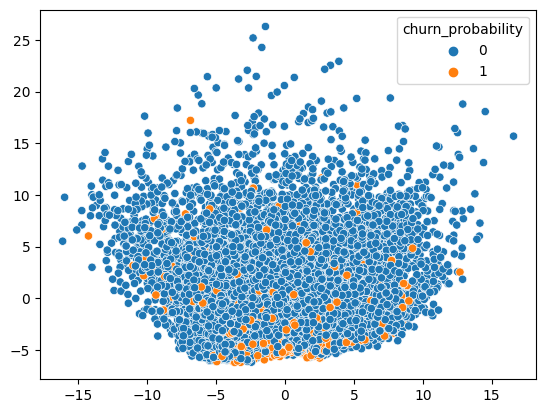

In [57]:
# Plot relation between components 1 and 2 with churn category
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)
plt.show()

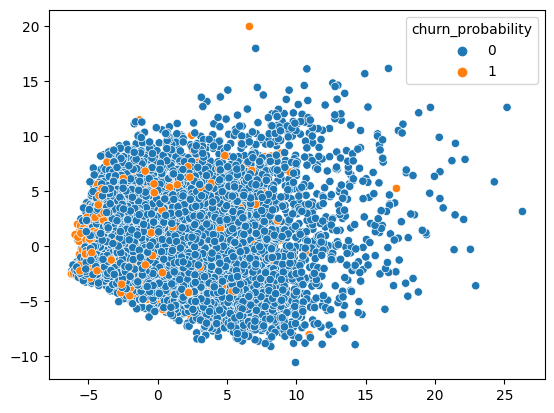

In [58]:
# Plot relation between components 2 and 3 with churn category
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)
plt.show()

### 5.3 Random forest classifier model with PCA

In [59]:
# One approach to address imbalanced datasets is to oversample the minority class.
# New examples can be synthesized from the existing examples.
# This is a type of data augmentation referred to as the Synthetic Minority Oversampling Technique, or SMOTE.
smt = SMOTE(random_state=2)
pca = PCA()
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create a pipeline with 1st element as SMOTE, 2nd as PCA and 3rd as Random forrest classifier
pipeline = make_pipeline(
    smt,
    pca,
    rfc
)

# Create hyper parameter tuning params
params = {
    "randomforestclassifier__n_estimators": [100, 150],
    "randomforestclassifier__min_samples_leaf": [20],
    "randomforestclassifier__max_depth": [7, 10],
    "randomforestclassifier__max_features": [7, 10],
    "pca__n_components": [40, 80]
}

# Create grid search cross validation with 4 folds
grid_search_pca_rfc = GridSearchCV(pipeline,
                           param_grid=params,
                           cv=3,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

In [60]:
%%time
# Fit the model with training data set
grid_search_pca_rfc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
CPU times: user 50.8 s, sys: 567 ms, total: 51.3 s
Wall time: 4min 48s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=2)),
                                       ('pca', PCA()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [40, 80],
                         'randomforestclassifier__max_depth': [7, 10],
                         'randomforestclassifier__max_features': [7, 10],
                         'randomforestclassifier__min_samples_leaf': [20],
                         'randomforestclassifier__n_estimators': [100, 150]},
             scoring='accuracy', verbose=1)

In [61]:
# Get the best parameters
best_params_pca_rfc = grid_search_pca_rfc.best_params_
print("Best Parameters:", best_params_pca_rfc)

# Get the best model
best_model_pca_rfc = grid_search_pca_rfc.best_estimator_
best_model_pca_rfc

Best Parameters: {'pca__n_components': 80, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__min_samples_leaf': 20, 'randomforestclassifier__n_estimators': 150}


Pipeline(steps=[('smote', SMOTE(random_state=2)), ('pca', PCA(n_components=80)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, max_features=10,
                                        min_samples_leaf=20, n_estimators=150,
                                        n_jobs=-1, random_state=42))])

#### 5.3.1 Model evaluation

Random forest classifier with PCA model
Model evaluation on train data
Confusion Matrix
[[12260  1224]
 [  127  1087]]
                      Metric   Value
0                   Accuracy  0.9081
1                Sensitivity  0.8954
2                Specificity  0.9092
3                  Precision  0.4704
4  Recall/True Positive Rate  0.8954
5        False Positive Rate  0.0908
6        False Negative Rate  0.1046
------------------------------------
ROC curve (area = 0.902306449476761)


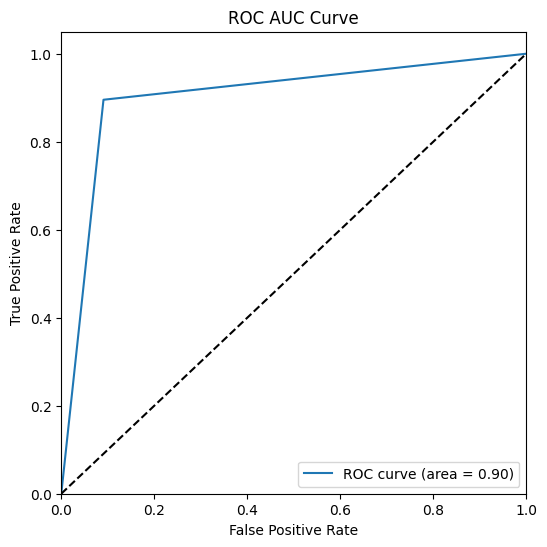

------------------------------------


In [62]:
# Predict on train set using the best model
# Create confusion matrix
# Plot ROC AUC curve

print("Random forest classifier with PCA model")
print("Model evaluation on train data")
y_train_pred = best_model_pca_rfc.predict(X_train_scaled)
create_confusion_matrix(y_train, y_train_pred)
draw_roc_auc_curve(y_train, y_train_pred)

Model evaluation on validation data
Confusion Matrix
[[5172  607]
 [ 155  366]]
                      Metric   Value
0                   Accuracy  0.8790
1                Sensitivity  0.7025
2                Specificity  0.8950
3                  Precision  0.3762
4  Recall/True Positive Rate  0.7025
5        False Positive Rate  0.1050
6        False Negative Rate  0.2975
------------------------------------
ROC curve (area = 0.7987298641351188)


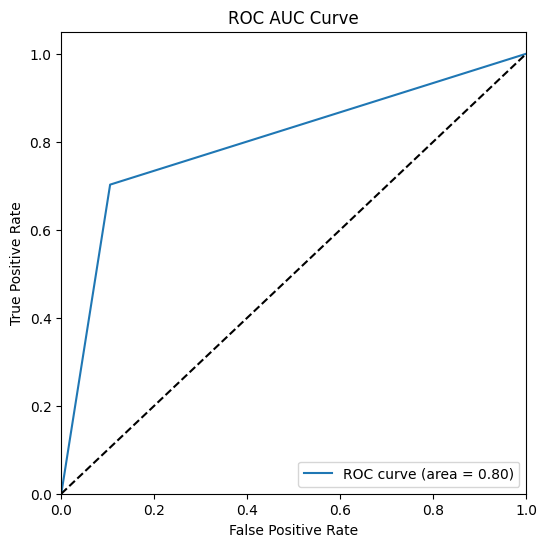

------------------------------------


In [63]:
# Predict on validation set using the best model
# Create confusion matrix
# Plot ROC AUC curve
print("Model evaluation on validation data")
y_val_pred = best_model_pca_rfc.predict(X_val_scaled)
create_confusion_matrix(y_val, y_val_pred)
draw_roc_auc_curve(y_val, y_val_pred)

**OBSERVATIONS**
1. Good overall classification performance on unseen data, indicating the model generalizes fairly well.
2. The model identifies a significant proportion of churners (Class 1)
3. Non-churners (Class 0) are classified accurately, with relatively few false positives.
4. ROC curve indicates the model's ability to distinguish between churners and non-churners effectively, though slightly less robust compared to the training set.

### 5.4 Extended gradient boosting classifier model with PCA

In [64]:
pca = PCA()
xgb = XGBClassifier(random_state=42, n_jobs=-1)

pipeline = make_pipeline(
    pca,
    xgb
)

params = {
    "xgbclassifier__n_estimators": [300],
    'xgbclassifier__learning_rate': [0.15, 0.2],
    'xgbclassifier__max_depth': [3],
    'xgbclassifier__subsample': [0.6],
    'xgbclassifier__colsample_bytree': [0.6],
    "pca__n_components": [10, 20]
}

grid_search_pca_xgb = GridSearchCV(pipeline,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

In [65]:
%%time
# Fit the model with training data set
grid_search_pca_xgb.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
CPU times: user 1.7 s, sys: 54.3 ms, total: 1.75 s
Wall time: 4.49 s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      i...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [10, 20],
                         'xgbclassifier__colsample_bytree': [0.6],
                         'xgbclassifier__learning_rate': [0.15, 0.2],
                         'xgbclassifier__max_depth': [3],
                         'xgbclassifier__n_estimators': [300],
                         'xgbclassifier__subsample': [0.6]},
             scoring='accuracy', verbose=1)

In [66]:
# Get the best parameters
best_params_pca_xgb = grid_search_pca_xgb.best_params_
print("Best Parameters:", best_params_pca_xgb)

# Get the best model
best_model_pca_xgb = grid_search_pca_xgb.best_estimator_
best_model_pca_xgb

Best Parameters: {'pca__n_components': 20, 'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 300, 'xgbclassifier__subsample': 0.6}


Pipeline(steps=[('pca', PCA(n_components=20)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.6, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.15,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

#### 5.4.1 Model evaluation

Extended gradient boosting classifier with PCA model
Model evaluation on train data
Confusion Matrix
[[13363   121]
 [  568   646]]
                      Metric   Value
0                   Accuracy  0.9531
1                Sensitivity  0.5321
2                Specificity  0.9910
3                  Precision  0.8422
4  Recall/True Positive Rate  0.5321
5        False Positive Rate  0.0090
6        False Negative Rate  0.4679
------------------------------------
ROC curve (area = 0.7615758037960176)


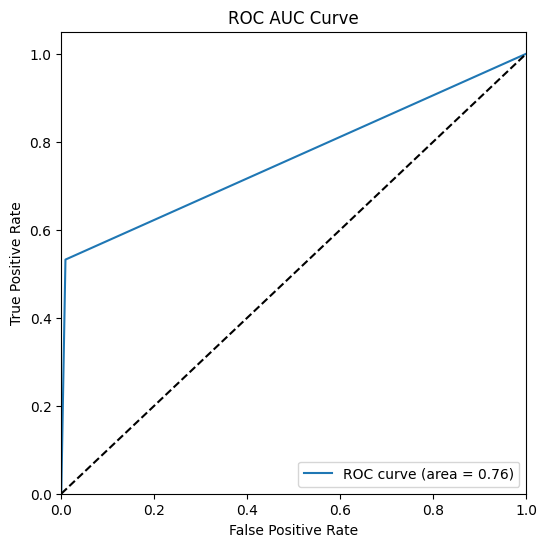

------------------------------------


In [67]:
# Predict on train set using the best model
# Create confusion matrix
# Plot ROC AUC curve
print("Extended gradient boosting classifier with PCA model")
print("Model evaluation on train data")
y_train_pred = best_model_pca_xgb.predict(X_train_scaled)
create_confusion_matrix(y_train, y_train_pred)
draw_roc_auc_curve(y_train, y_train_pred)

Model evaluation on validation data
Confusion Matrix
[[5680   99]
 [ 355  166]]
                      Metric   Value
0                   Accuracy  0.9279
1                Sensitivity  0.3186
2                Specificity  0.9829
3                  Precision  0.6264
4  Recall/True Positive Rate  0.3186
5        False Positive Rate  0.0171
6        False Negative Rate  0.6814
------------------------------------
ROC curve (area = 0.6507435253527315)


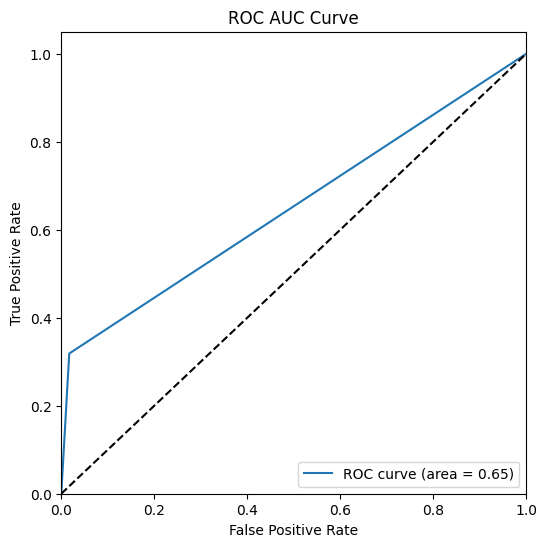

------------------------------------


In [68]:
# Predict on train set using the validation model
# Create confusion matrix
# Plot ROC AUC curve
print("Model evaluation on validation data")
y_val_pred = best_model_pca_xgb.predict(X_val_scaled)
create_confusion_matrix(y_val, y_val_pred)
draw_roc_auc_curve(y_val, y_val_pred)

### OBSERVATIONS
1. The model achieves high accuracy on the validation set, showing consistent classification of the majority class.
2. Non-churners are classified with high precision, with very few false positives.
3. The ROC curve shows an AUC of 0.76, indicating suboptimal performance in distinguishing churners from non-churners. This suggests that the model struggles to generalize well on unseen data.

**We have built model with PCA to get model with limited features. Now, we need to find out features which are most important in prediction whic is not possible with PCA**

### 5.5 Logistic regression model

In [69]:
%%time
logreg = LogisticRegression(max_iter=100, tol=0.01, n_jobs=-1, solver="saga")

# Select top 30 features using RFE
rfe = RFE(logreg, n_features_to_select=30)

# Fit logistic regression model with RFE 
rfe = rfe.fit(X_train_scaled, y_train)

CPU times: user 1min 3s, sys: 296 ms, total: 1min 4s
Wall time: 1min 4s


In [70]:
# All features and importance sequence
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 38),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 5),
 ('onnet_mou_7', False, 113),
 ('onnet_mou_8', False, 125),
 ('offnet_mou_6', False, 22),
 ('offnet_mou_7', False, 47),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 128),
 ('roam_ic_mou_7', False, 17),
 ('roam_ic_mou_8', False, 28),
 ('roam_og_mou_6', False, 122),
 ('roam_og_mou_7', False, 106),
 ('roam_og_mou_8', False, 27),
 ('loc_og_t2t_mou_6', False, 23),
 ('loc_og_t2t_mou_7', False, 54),
 ('loc_og_t2t_mou_8', False, 10),
 ('loc_og_t2m_mou_6', False, 74),
 ('loc_og_t2m_mou_7', False, 67),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 114),
 ('loc_og_t2f_mou_7', False, 16),
 ('loc_og_t2f_mou_8', False, 15),
 ('loc_og_t2c_mou_6', False, 68),
 ('loc_og_t2c_mou_7', False, 88),
 ('loc_og_t2c_mou_8', False, 42),
 ('loc_og_mou_6', False, 24),
 ('loc_og_mou_7', False, 40),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 116),
 ('std_og_t2t_mou_7', False, 3),
 (

In [71]:
# Selected features using RFE
selected_features_lr = X_train_scaled.columns[rfe.support_]
selected_features_lr

Index(['arpu_6', 'arpu_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_6',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_6', 'count_rech_2g_8',
       'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_8', 'monthly_2g_8', 'aon',
       'vbc_3g_8', 'fb_user_8_1'],
      dtype='object')

In [72]:
# Fir logistic regression model with selected features
X_train_scaled_lr = X_train_scaled[selected_features_lr]
logreg.fit(X_train_scaled_lr, y_train)

LogisticRegression(n_jobs=-1, solver='saga', tol=0.01)

#### 5.5.1 Model evaluation

Logistic regression model
Model evaluation on train data
Confusion Matrix
[[13307   177]
 [  821   393]]
                      Metric   Value
0                   Accuracy  0.9321
1                Sensitivity  0.3237
2                Specificity  0.9869
3                  Precision  0.6895
4  Recall/True Positive Rate  0.3237
5        False Positive Rate  0.0131
6        False Negative Rate  0.6763
------------------------------------
ROC curve (area = 0.6552982801753693)


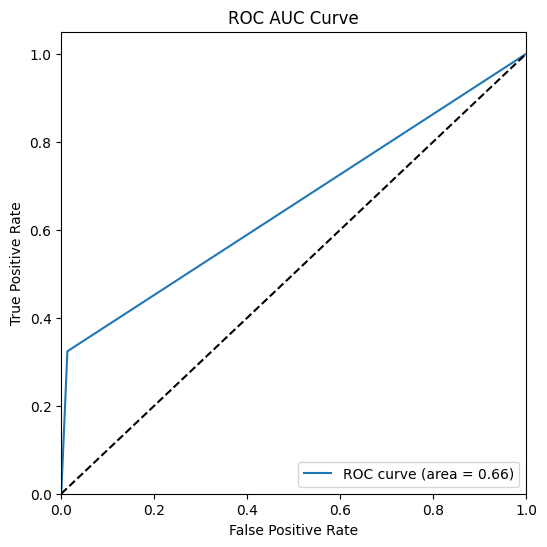

------------------------------------


In [73]:
# Predict on training data
# Create confusion matrix
# Plot ROC AUC curve
print("Logistic regression model")
print("Model evaluation on train data")
y_train_pred = logreg.predict(X_train_scaled_lr)
create_confusion_matrix(y_train, y_train_pred)
draw_roc_auc_curve(y_train, y_train_pred)

Model evaluation on validation data
Confusion Matrix
[[5706   73]
 [ 357  164]]
                      Metric   Value
0                   Accuracy  0.9317
1                Sensitivity  0.3148
2                Specificity  0.9874
3                  Precision  0.6920
4  Recall/True Positive Rate  0.3148
5        False Positive Rate  0.0126
6        False Negative Rate  0.6852
------------------------------------
ROC curve (area = 0.6510736636953108)


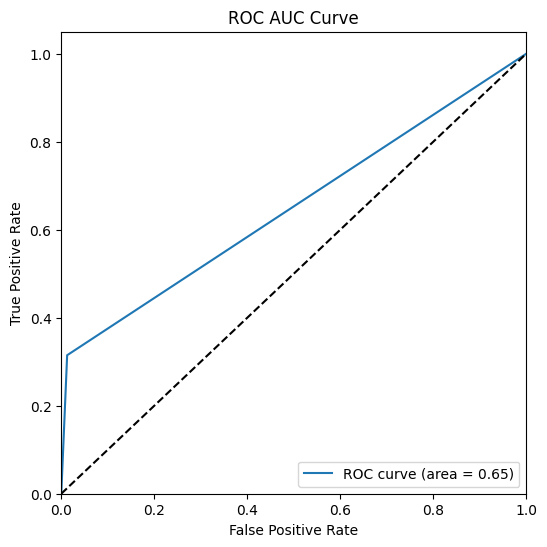

------------------------------------


In [74]:
# Predict on validation data
# Create confusion matrix
# Plot ROC AUC curve
print("Model evaluation on validation data")
y_val_pred = logreg.predict(X_val_scaled[selected_features_lr])
create_confusion_matrix(y_val, y_val_pred)
draw_roc_auc_curve(y_val, y_val_pred)

**OBSERVATIONS**
1. The area under the ROC curve indicates moderate discriminative power
2. The ROC curve is closer to the diagonal, suggesting the model struggles to separate churners from non-churners effectively.
3. The model achieves a high accuracy, but this metric is misleading due to class imbalance (more non-churners than churners).
4. High specificity, with a 98.64% rate of correctly identifying non-churners
5. Very low rate of falsely classifying non-churners as churners 

### 5.6 Random forest classifier model

In [75]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    "n_estimators": [100],
    "min_samples_leaf": [30, 40],
    "max_depth": [5, 7],
    "max_features": [3, 5],
}

grid_search_rfc = GridSearchCV(rfc,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

In [76]:
%%time
# Fit the model with training data set
grid_search_rfc.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
CPU times: user 3.42 s, sys: 88.9 ms, total: 3.51 s
Wall time: 18.8 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'max_features': [3, 5],
                         'min_samples_leaf': [30, 40], 'n_estimators': [100]},
             scoring='accuracy', verbose=1)

In [77]:
# Get the best parameters
best_params_rfc = grid_search_rfc.best_params_
print("Best Parameters:", best_params_rfc)

# Get the best model
best_model_rfc = grid_search_rfc.best_estimator_
best_model_rfc

Best Parameters: {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 30, 'n_estimators': 100}


RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=30,
                       n_jobs=-1, random_state=42)

#### 5.6.1 Model evaluation

Random forest classifier model
Model evaluation on train data
Confusion Matrix
[[13345   139]
 [  659   555]]
                      Metric   Value
0                   Accuracy  0.9457
1                Sensitivity  0.4572
2                Specificity  0.9897
3                  Precision  0.7997
4  Recall/True Positive Rate  0.4572
5        False Positive Rate  0.0103
6        False Negative Rate  0.5428
------------------------------------
ROC curve (area = 0.7234289391490654)


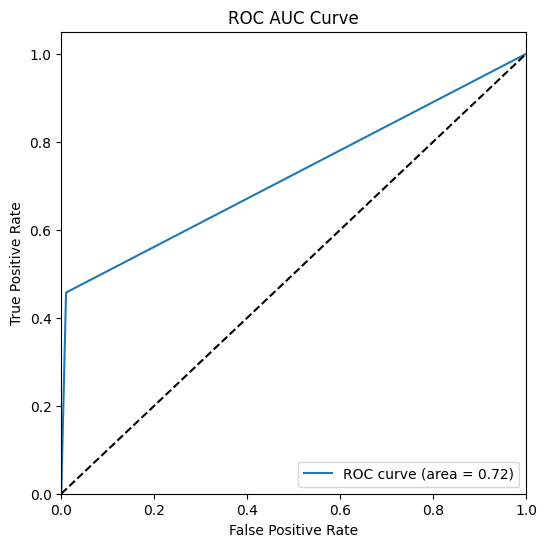

------------------------------------


In [78]:
# Predict on train set using the best model
# Create confusion matrix
# Plot ROC AUC curve
print("Random forest classifier model")
print("Model evaluation on train data")
y_train_pred = best_model_rfc.predict(X_train_scaled)
create_confusion_matrix(y_train, y_train_pred)
draw_roc_auc_curve(y_train, y_train_pred)

Model evaluation on validation data
Confusion Matrix
[[5707   72]
 [ 307  214]]
                      Metric   Value
0                   Accuracy  0.9398
1                Sensitivity  0.4107
2                Specificity  0.9875
3                  Precision  0.7483
4  Recall/True Positive Rate  0.4107
5        False Positive Rate  0.0125
6        False Negative Rate  0.5893
------------------------------------
ROC curve (area = 0.6991448287681357)


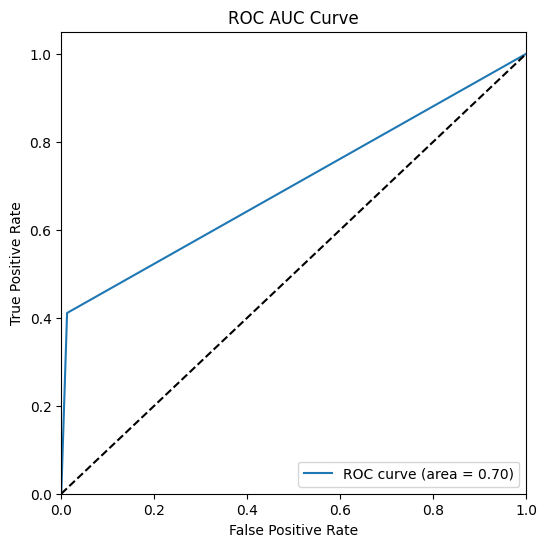

------------------------------------


In [79]:
# Predict on validation set using the best model
# Create confusion matrix
# Plot ROC AUC curve
print("Model evaluation on validation data")
y_val_pred = best_model_rfc.predict(X_val_scaled)
create_confusion_matrix(y_val, y_val_pred)
draw_roc_auc_curve(y_val, y_val_pred)

In [80]:
# Feature importances in sorted order
rfc_feature = list(zip(X_train_scaled.columns, best_model_rfc.feature_importances_))
rfc_feature_sorted = sorted(rfc_feature, reverse=True, key=lambda x : x[1])
rfc_feature_sorted

[('loc_ic_t2m_mou_8', 0.07764523775000094),
 ('total_paid_amt_8', 0.06859472448685108),
 ('total_ic_mou_8', 0.05973337320964476),
 ('total_rech_amt_8', 0.0527033833119236),
 ('loc_ic_mou_8', 0.052043146882504686),
 ('total_og_mou_8', 0.04165259600682306),
 ('loc_ic_t2t_mou_8', 0.040399811456447214),
 ('max_rech_amt_8', 0.035689261515983714),
 ('loc_og_mou_8', 0.034998034470363766),
 ('loc_og_t2m_mou_8', 0.034146763431285546),
 ('arpu_8', 0.02959321158827295),
 ('total_rech_amt_data_8', 0.027308386833826345),
 ('offnet_mou_8', 0.025040704663499808),
 ('loc_og_t2t_mou_8', 0.021960531394852944),
 ('std_ic_mou_8', 0.020396981853884458),
 ('onnet_mou_8', 0.018204472718455586),
 ('last_day_rch_amt_8', 0.016177611109159697),
 ('roam_ic_mou_8', 0.013559213008297115),
 ('loc_ic_t2f_mou_8', 0.012251316486929857),
 ('total_ic_mou_7', 0.010506012116929838),
 ('roam_og_mou_8', 0.0098725472427928),
 ('std_ic_t2m_mou_8', 0.009708351019309152),
 ('max_rech_data_8', 0.00936167280703592),
 ('vol_2g_mb_8

**OBSERVATIONS**
1. The model has high accuracy, primarily driven by the correct classification of the majority class (non-churners).
2. High specificity reflects strong performance in identifying non-churners accurately.
3. A relatively high precision, suggesting that when the model predicts churners, it is mostly correct.
4. The ROC curve reflects a reasonably good trade-off between true positives and false positives, but there's still significant room for improvement in the model's discriminatory ability.

### 5.7 Extended gradient boosting classifier model

In [81]:
xgb = XGBClassifier(random_state=42, n_jobs=-1)

params = {   
    "n_estimators": [100],
    'learning_rate': [0.005, 0.1],
    'max_depth': [5, 7],
    'subsample': [0.6, 0.7],
    'colsample_bytree': [0.6, 0.7]
}

grid_search_xgb = GridSearchCV(xgb,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

In [82]:
%%time
# Fit the model with training data set
grid_search_xgb.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
CPU times: user 5.41 s, sys: 195 ms, total: 5.6 s
Wall time: 1min 15s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7],
                         'learning_rate': [0.005, 0.1], 'max_depth': [5, 7],
                         'n_estimators': [100], 'subsample': [0.6, 0.7]},
             scoring='accuracy', verbose=1)

In [83]:
# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters:", best_params_xgb)

# Get the best model
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

#### 5.7.1 Model evaluation

Extended gradient boosting classifier model
Model evaluation on train data
Confusion Matrix
[[13362   122]
 [  330   884]]
                      Metric   Value
0                   Accuracy  0.9692
1                Sensitivity  0.7282
2                Specificity  0.9910
3                  Precision  0.8787
4  Recall/True Positive Rate  0.7282
5        False Positive Rate  0.0090
6        False Negative Rate  0.2718
------------------------------------
ROC curve (area = 0.8595617870615586)


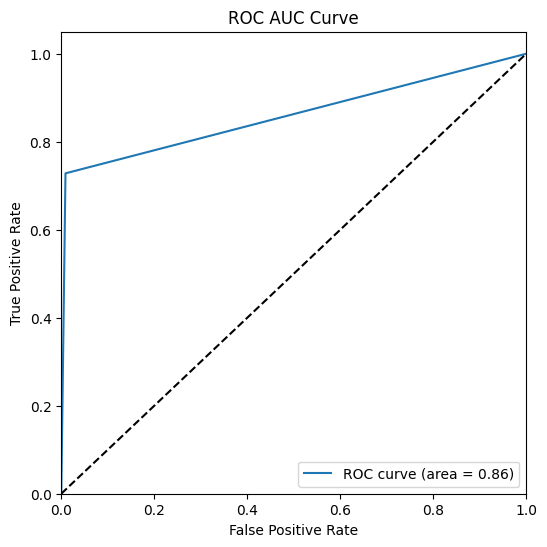

------------------------------------


In [84]:
# Predict on train set using the best model
# Create confusion matrix
# Plot ROC AUC curve
print("Extended gradient boosting classifier model")
print("Model evaluation on train data")
y_train_pred = best_model_xgb.predict(X_train_scaled)
create_confusion_matrix(y_train, y_train_pred)
draw_roc_auc_curve(y_train, y_train_pred)

Model evaluation on validation data
Confusion Matrix
[[5668  111]
 [ 264  257]]
                      Metric   Value
0                   Accuracy  0.9405
1                Sensitivity  0.4933
2                Specificity  0.9808
3                  Precision  0.6984
4  Recall/True Positive Rate  0.4933
5        False Positive Rate  0.0192
6        False Negative Rate  0.5067
------------------------------------
ROC curve (area = 0.7370373371851687)


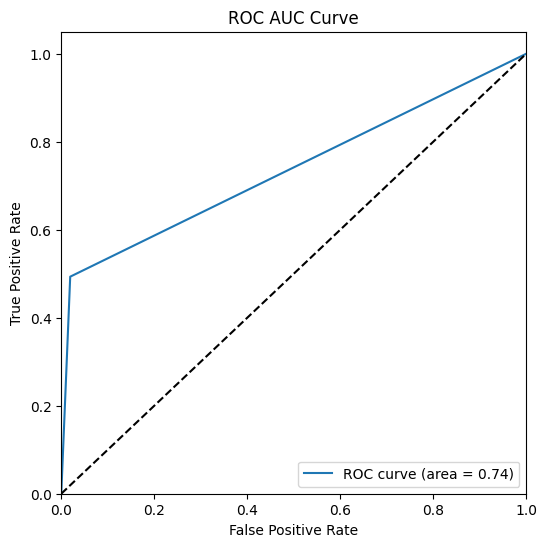

------------------------------------


In [85]:
# Predict on validation set using the best model
# Create confusion matrix
# Plot ROC AUC curve
print("Model evaluation on validation data")
y_val_pred = best_model_xgb.predict(X_val_scaled)
create_confusion_matrix(y_val, y_val_pred)
draw_roc_auc_curve(y_val, y_val_pred)

In [86]:
# Feature importances in sorted order
xgb_feature = list(zip(X_train_scaled.columns, best_model_xgb.feature_importances_))
xgb_feature_sorted = sorted(xgb_feature, reverse=True, key=lambda x : x[1])
xgb_feature_sorted

[('total_ic_mou_8', 0.078330785),
 ('fb_user_8_1', 0.05190459),
 ('total_paid_amt_8', 0.045408692),
 ('loc_ic_t2m_mou_8', 0.044309594),
 ('loc_ic_mou_8', 0.040905934),
 ('loc_ic_t2t_mou_8', 0.023020124),
 ('roam_og_mou_8', 0.016647723),
 ('last_day_rch_amt_8', 0.015824012),
 ('total_rech_amt_data_8', 0.011478281),
 ('std_og_mou_7', 0.0108757885),
 ('vol_2g_mb_8', 0.010528806),
 ('roam_ic_mou_8', 0.01038222),
 ('loc_og_mou_8', 0.008944116),
 ('spl_og_mou_8', 0.008563609),
 ('loc_og_t2m_mou_8', 0.008459342),
 ('arpu_2g_8', 0.008403859),
 ('spl_ic_mou_8', 0.008369914),
 ('total_rech_num_7', 0.008299886),
 ('max_rech_data_8', 0.008130927),
 ('loc_ic_mou_7', 0.008048417),
 ('roam_og_mou_7', 0.00801829),
 ('std_ic_mou_8', 0.007953478),
 ('total_ic_mou_6', 0.007451704),
 ('arpu_3g_6', 0.007433559),
 ('total_og_mou_8', 0.0074173035),
 ('arpu_7', 0.0072864187),
 ('max_rech_data_7', 0.007016127),
 ('fb_user_7_1', 0.007006178),
 ('total_og_mou_7', 0.0065989215),
 ('std_ic_t2f_mou_6', 0.006466829)

**OBSERVATIONS**
1. The model performs exceptionally well on the training set, achieving a high level of overall correctness.
2. The model identifies about 70% of churners in the training set, indicating strong recall for the positive class.
3. Excellent specificity means the model effectively identifies non-churners.
4. High precision indicates that most of the predicted churn cases are correct.
5. The ROC curve illustrates a strong separation between the classes, as evidenced by the high AUC of 0.75.

## 6. Creating submission file

Each file contains 2 columns, id and churn_probability

In [87]:
# # creating submission file for Random forest classifier model fitted with PCA
# df_telecom_test_bkp["churn_probability"] = best_model_pca_rfc.predict(X_test_scaled)
# output = df_telecom_test_bkp[['id','churn_probability']]
# output.to_csv('Submission_pca_rfc.csv',index=False)
# output.head()

In [88]:
# creating submission file for Extended Gradient boosting classifier model fitted with PCA
df_telecom_test_bkp["churn_probability"] = best_model_pca_xgb.predict(X_test_scaled)
output = df_telecom_test_bkp[['id','churn_probability']]
output.to_csv('/kaggle/working/Submission.csv',index=False)
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [89]:
# # creating submission file for Random forest classifier model
# df_telecom_test_bkp["churn_probability"] = best_model_rfc.predict(X_test_scaled)
# output = df_telecom_test_bkp[['id','churn_probability']]
# output.to_csv('Submission_rfc.csv',index=False)
# output.head()

In [90]:
# # creating submission file for Extended Gradient boosting classifier model
# df_telecom_test_bkp["churn_probability"] = best_model_xgb.predict(X_test_scaled)
# output = df_telecom_test_bkp[['id','churn_probability']]
# output.to_csv('Submission_xgb.csv',index=False)
# output.head()

## 7. Business Recommendations

Based on the analysis of our XGBClassifier model, here are some business ideas to improve churn rate:

- Local Call offers: Offer competitive rates and bonuses for local calls.
- High-Value Recharges: Offer discounts for high-value recharges to retain customers.
- STD Offers: Provide personalized STD packages.
- Roaming Offers: Provide personalized roaming packages to frequent roamers.
- Data Recharge Strategies: Promote data packs with targeted marketing campaigns.
- Better 2G/3G area coverage where 2G/3G services are not good, it contributes to churn.

Implementing these strategies can effectively reduce churn and improve customer retention in your telecom business.

## 8. Summary
- Data reading, understanding, cleaning is done
- Exploratory dta analysis is done
- Data engineering is done
- Built models using Random forest classifier with and without PCA, Extended gradient boosting classifier with and without PCA, Logistic regression
- Extended Gradient boosting classifier model fitted with PCA gives best result in predicting result close to reality
- Important features are related to local incoming calls, STD outgoing calls, roaming calls, data packs, high value recharges etc..